# OTRAIS PRAKTISKAIS DARBS MAKSLĪGĀ INTELEKTA PAMATOS

### Darba autori:
###### Marks Kļeščs 231DDB008
###### Andris Karpenko 231DDB023
###### Daniels Titkovs
###### Deniss Tomko

#####
Šī notebook ir otrais darbs mākslīgā intelekta pamatos. Kods ir sadalīts loģiskos blokos, un visi komentāri ir pārcelti atsevišķās Markdown šūnās labākai lasāmībai un strukturēšanai.

## Sākotnējā Iestatīšana un Bibliotēku Importēšana

Šis koda bloks kalpo kā galvenais sākuma punkts jūsu datu analīzes un mašīnmācīšanās projektam. Tas apvieno visas nepieciešamās Python bibliotēkas un veic sākotnējos konfigurācijas iestatījumus, nodrošinot, ka visi atkarīgie komponenti ir pieejami pirms turpmākās analīzes.

**Importētās bibliotēkas ietver:**

* **`pandas` (pd):** Datu manipulācijai un analīzei, īpaši darbam ar tabulas datiem (DataFrames).
* **`numpy` (np):** Skaitliskiem aprēķiniem un darbam ar masīviem.
* **`matplotlib.pyplot` (plt):** Datu vizualizācijai un grafiku zīmēšanai.
* **`seaborn` (sns):** Uzlabotai datu vizualizācijai, kas balstās uz `matplotlib` un nodrošina pievilcīgākus statistikas grafikus.
* **`sklearn.model_selection`:** Rīki datu sadalīšanai apmācības un testēšanas kopās (piem., `train_test_split`).
* **`sklearn.preprocessing`:** Datu pirmsapstrādes rīki, piemēram, datu mērogošanai (`StandardScaler`).
* **`sklearn.cluster`:** Klasterizācijas algoritmi, piemēram, `AgglomerativeClustering` un `KMeans`.
* **`sklearn.metrics`:** Metrikas modeļu veiktspējas novērtēšanai klasifikācijas, klasterizācijas un citos uzdevumos (piem., `silhouette_score`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix`, `classification_report`).
* **`sklearn.neural_network`:** Neironu tīklu modeļi (piem., `MLPClassifier`).
* **`sklearn.linear_model`:** Lineārie modeļi (piem., `LogisticRegression`).
* **`sklearn.tree`:** Lēmumu koku modeļi (piem., `DecisionTreeClassifier`).
* **`sklearn.neighbors`:** Tuvāko kaimiņu modeļi (piem., `KNeighborsClassifier`).
* **`scipy.cluster.hierarchy`:** Rīki hierarhiskās klasterizācijas vizualizācijai (dendrogrammas).

**Papildu iestatījumi:**

* **`pd.set_option('display.max_columns', None)` un `pd.set_option('display.width', None)`:** Šie iestatījumi nodrošina, ka, printējot Pandas DataFrame objektus, tiek parādītas visas kolonnas bez saīsinājumiem, un izvades platums tiek pielāgots, lai atbilstu datu struktūrai, uzlabojot datu inspekciju.
* **`file_name = 'heart.csv'`:** Tiek definēts datu faila nosaukums, kas tiks izmantots turpmākajai datu ielādei.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import (
    silhouette_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage

# Papildu iestatījumi Pandas DataFrame attēlošanai
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Helper funkcija datu struktūru tukšuma pārbaudei
def is_non_empty_data_structure(data_var):
    """Pārbauda, vai mainīgais ir NE-TUKŠS pandas DataFrame, Series, vai NumPy masīvs."""
    if data_var is None:
        return False
    if isinstance(data_var, (pd.DataFrame, pd.Series)):
        return not data_var.empty
    if isinstance(data_var, np.ndarray):
        return data_var.size > 0
    return False

# Datu faila nosaukums un ielādes paziņojums
file_name = 'heart.csv'
print(f"Datu ielāde no faila: {file_name}")

Datu ielāde no faila: heart.csv


## Datu Ielāde un Sākotnējā Pārbaude

Šajā posmā mēs veicam datu kopas ielādi no CSV faila un veicam tās sākotnējo pārbaudi, lai nodrošinātu datu integritāti un izprastu to struktūru.

**Galvenās darbības:**
* **Faila ielāde:** Izmantojam `pandas.read_csv()` funkciju, lai ielādētu datus no norādītā faila (`heart.csv`).
* **Kļūdu apstrāde:** Kods ietver `try-except` bloku, kas nodrošina drošu faila ielādi, apstrādājot iespējamās kļūdas, piemēram, `FileNotFoundError` (fails nav atrasts).
* **Datu apskats:**
    * `data.head()` tiek izmantots, lai parādītu pirmās piecas datu kopas rindas, sniedzot ātru ieskatu datu saturā.
    * `data.dtypes` sniedz informāciju par katras kolonnas datu tipiem.
    * `data.info()` sniedz vispārīgu informāciju par DataFrame, ieskaitot rindu skaitu, kolonnu skaitu, katras kolonnas non-null vērtību skaitu un atmiņas lietojumu.

Šī sākotnējā analīze ir būtiska, lai identificētu iespējamās problēmas, piemēram, trūkstošās vērtības vai nepareizus datu tipus, pirms turpmākas datu apstrādes.

In [23]:
file_name = 'heart.csv'

try:
    data = pd.read_csv(file_name)
    print("\nPirmās 5 datu rindas:")
    print(data.head())
    print("\nDatu tipu informācija:")
    print(data.dtypes)
    print("\nVispārīga informācija par datu kopu:")
    data.info()

except FileNotFoundError:
    print(f"KĻŪDA: Fails '{file_name}' nav atrasts. Pārliecinieties, ka fails atrodas pareizajā direktorijā.")
    data = None
except Exception as e:
    print(f"Radās kļūda, ielādējot datus: {e}")
    data = None


Pirmās 5 datu rindas:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Datu tipu informācija:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
Rest

## Datu priekšapstrāde

### Trūkstošo vērtību apstrāde, pazīmju atlase un datu sagatavošana klasterizācijai un klasifikācijai

Šajā posmā mēs veicam svarīgus datu priekšapstrādes soļus, lai sagatavotu datu kopu mašīnmācīšanās modeļiem.

**Trūkstošo vērtību apstrāde:**
Pirmkārt, mēs pārbaudām un apstrādājam trūkstošās vērtības. Kods saskaita trūkstošās vērtības katrā kolonnā un pēc tam izdzēš visas rindas, kas satur vismaz vienu trūkstošo vērtību (izmantojot `dropna(inplace=True)`). Tiek nodrošināta atbilstoša ziņošana par izdzēsto rindu skaitu un datu kopas stāvokli pēc šīs darbības.

**Pazīmju un mērķa mainīgā definēšana:**
Tiek noteiktas analīzei izmantojamās pazīmju kolonnas (piemēram, 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak') un mērķa mainīgā kolonna (`'HeartDisease'`). Tiek veikta pārbaude, vai šīs kolonnas pastāv datu kopā pēc trūkstošo vērtību apstrādes, lai novērstu kļūdas.

**Datu pārbaude un sadalījums:**
* Tiek pārbaudīts mērķa mainīgā unikālo klašu skaits un to sadalījums.
* **Klasterizācijai:** Tiek sagatavoti pilni skalēti dati. `StandardScaler` tiek izmantots, lai mērogotu pazīmes, kas ir kritiski klasterizācijas algoritmiem, piemēram, K-Means, jo tie ir jutīgi pret pazīmju mērogu.
* **Klasifikācijai:** Dati tiek sadalīti apmācības un testēšanas kopās, parasti 70/30 vai 80/20 attiecībā. Svarīgi ir izmantot `stratify=y_true`, lai nodrošinātu, ka klašu proporcijas tiek saglabātas gan apmācības, gan testēšanas kopās, kas ir īpaši svarīgi, ja klašu sadalījumā ir nelīdzsvarotība. Apmācības un testēšanas kopu pazīmes tiek mērogotas atsevišķi, nodrošinot, ka mērogošanas transformācija tiek balstīta tikai uz apmācības datiem, lai novērstu datu noplūdi no testēšanas kopas.

Visbeidzot, tiek veiktas pārbaudes, lai pārliecinātos, ka dati ir veiksmīgi sagatavoti gan klasterizācijas, gan klasifikācijas posmiem. Ja datu apstrādes gaitā rodas problēmas, nākamie posmi tiks izlaisti.

In [24]:
if data is not None:
    print("Trūkstošo vērtību skaits pirms dzēšanas:")
    print(data.isnull().sum())

    initial_rows = data.shape[0]
    data.dropna(inplace=True)
    rows_after_dropna = data.shape[0]
    print(f"\nIzdzēstas rindas ar trūkstošām vērtībām: {initial_rows - rows_after_dropna}")
    print(f"Objektu skaits pēc NaN dzēšanas: {rows_after_dropna}")

    if data.empty:
        print("\nPēc NaN dzēšanas dati nav palikuši. Pārbaudiet savu datu kopu vai trūkstošo vērtību apstrādes metodi.")
        X = None
        y_true = None
        X_scaled = None
        X_train_scaled = X_test_scaled = y_train = y_test = None
        known_n_classes = None
    else:
        feature_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

        target_column = 'HeartDisease'

        missing_cols = [col for col in feature_columns + [target_column] if col not in data.columns]
        if missing_cols:
            print(f"KĻŪDA: Pēc NaN apstrādes trūkst nepieciešamās kolonnas: {missing_cols}")
            X = None
            y_true = None
            X_scaled = None
            X_train_scaled = X_test_scaled = y_train = y_test = None
            known_n_classes = None
        else:
            X = data[feature_columns]
            y_true = data[target_column]

            known_n_classes = len(y_true.unique())
            print(f"\nDati satur {known_n_classes} klases (saskaņā ar '{target_column}').")
            print("Objektu sadalījums pa klasēm:")
            print(y_true.value_counts())
            print("\nObjektu procentuālais sadalījums pa klasēm:")
            print(y_true.value_counts(normalize=True) * 100)

            scaler_full = StandardScaler()
            X_scaled = scaler_full.fit_transform(X)
            print(f"\nPilnie dati klasterizācijai ir mērogoti. X_scaled forma: {X_scaled.shape}")

            X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42, stratify=y_true)

            print(f"\nDati klasifikācijai ir sadalīti apmācības ({X_train.shape[0]} objekti) un testēšanas ({X_test.shape[0]} objekti) kopās.")
            print("Klašu sadalījums apmācības kopā:")
            print(y_train.value_counts())
            print("Klašu sadalījums testēšanas kopā:")
            print(y_test.value_counts())

            scaler_split = StandardScaler()
            X_train_scaled = scaler_split.fit_transform(X_train)
            X_test_scaled = scaler_split.transform(X_test)

            print("Pazīmes klasifikācijai ir veiksmīgi mērogotas (apmācības un testēšanas kopas).")
            print(f"Mērogoto apmācības datu forma: {X_train_scaled.shape}")
            print(f"Mērogoto testēšanas datu forma: {X_test_scaled.shape}")

else:
    print("Dati netika veiksmīgi ielādēti vai ir tukši pēc priekšapstrādes. Priekšapstrāde un datu sagatavošana izlaista.")
    X_scaled = None
    X_train_scaled = X_test_scaled = y_train = y_test = None
    known_n_classes = None

perform_clustering = (X_scaled is not None and y_true is not None)
perform_classification = (X_train_scaled is not None and X_test_scaled is not None and y_train is not None and y_test is not None)

if not perform_clustering:
    print("\nKlasterizācija tiks izlaista datu problēmu dēļ.")
if not perform_classification:
    print("\nKlasifikācija tiks izlaista datu problēmu vai trūkstoša mērķa mainīgā dēļ.")

Trūkstošo vērtību skaits pirms dzēšanas:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Izdzēstas rindas ar trūkstošām vērtībām: 0
Objektu skaits pēc NaN dzēšanas: 918

Dati satur 2 klases (saskaņā ar 'HeartDisease').
Objektu sadalījums pa klasēm:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Objektu procentuālais sadalījums pa klasēm:
HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

Pilnie dati klasterizācijai ir mērogoti. X_scaled forma: (918, 6)

Dati klasifikācijai ir sadalīti apmācības (642 objekti) un testēšanas (276 objekti) kopās.
Klašu sadalījums apmācības kopā:
HeartDisease
1    355
0    287
Name: count, dtype: int64
Klašu sadalījums testēšanas kopā:
HeartDisease
1    153
0    123
Name: count, dtype: int64
Pazīmes klasifikācijai ir v

## Datu Vizualizācija

Datu vizualizācija ir svarīgs solis datu izpētē, kas ļauj mums gūt ieskatu datu struktūrā, sadalījumā un attiecībās starp pazīmēm. Šajā sadaļā mēs izveidosim vairākus grafikus, lai labāk izprastu "sirds slimību" datu kopu.

Pirms jebkādu vizualizāciju veikšanas tiek pārbaudīts, vai datu kopa `data` ir veiksmīgi ielādēta un nav tukša.

### 1. Vienkāršais Līniju Grafiks

**Mērķis:** Attēlot izvēlēto atribūtu vērtību dinamiku vai tendences attiecībā pret datu indeksa secību. Lai gan tas nav īpaši informatīvs laika sēriju kontekstā (jo dati nav laika sērijas), tas var palīdzēt ātri pamanīt anomālijas vai liela mēroga svārstības konkrētos atribūtos.

**Izmantotie atribūti:** 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'.

**Kods:** Tiek izmantota `pandas.DataFrame.plot()` metode.

### 2. Histogrammas Skaitliskajiem Atribūtiem

**Mērķis:** Parādīt skaitlisko atribūtu vērtību sadalījumu. Histogrammas palīdz identificēt datu formas (piemēram, normāls sadalījums, slīps sadalījums), blīvumus, pīķus un ārkārtas vērtības (outliers).

**Izmantotie atribūti:** Tiek atlasītas visas skaitliskās pazīmes no oriģinālā sirds datu atribūtu saraksta.

**Piezīme par kategoriskajiem atribūtiem:** Funkcija `.hist()` ir paredzēta skaitliskiem datiem. Kategoriskajiem atribūtiem (piemēram, 'Sex', 'ChestPainType') šī metode netiek izmantota. To vizualizācijai parasti izmanto stabiņu diagrammas (piemēram, `seaborn.countplot` vai `pandas.value_counts().plot(kind='bar')`).

### 3. Pāru Grafiki (Pair Plots)

**Mērķis:** Pāru grafiki ir sarežģītāks vizualizācijas veids, kas parāda attiecības starp visiem norādītajiem skaitliskajiem atribūtiem pa pāriem. Katra rinda un kolonna atbilst vienam atribūtam.
* **Diagonāle:** Parasti attēlo viena atribūta sadalījumu (piemēram, blīvuma diagrammu - KDE).
* **Ārpus diagonāles:** Attēlo izkliedes diagrammas (scatter plots), kas parāda attiecības starp diviem dažādiem atribūtiem.
Ja ir norādīts mērķa mainīgais (piemēram, 'HeartDisease'), grafiki tiek krāsoti atbilstoši mērķa klasei, kas ļauj vizuāli novērtēt, vai pazīmes palīdz atšķirt dažādas klases.

**Izmantotie atribūti:** 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', un mērķa mainīgais 'HeartDisease' (ja pieejams).

Veido līniju grafiku atribūtiem: Age, RestingBP, Cholesterol, MaxHR, Oldpeak


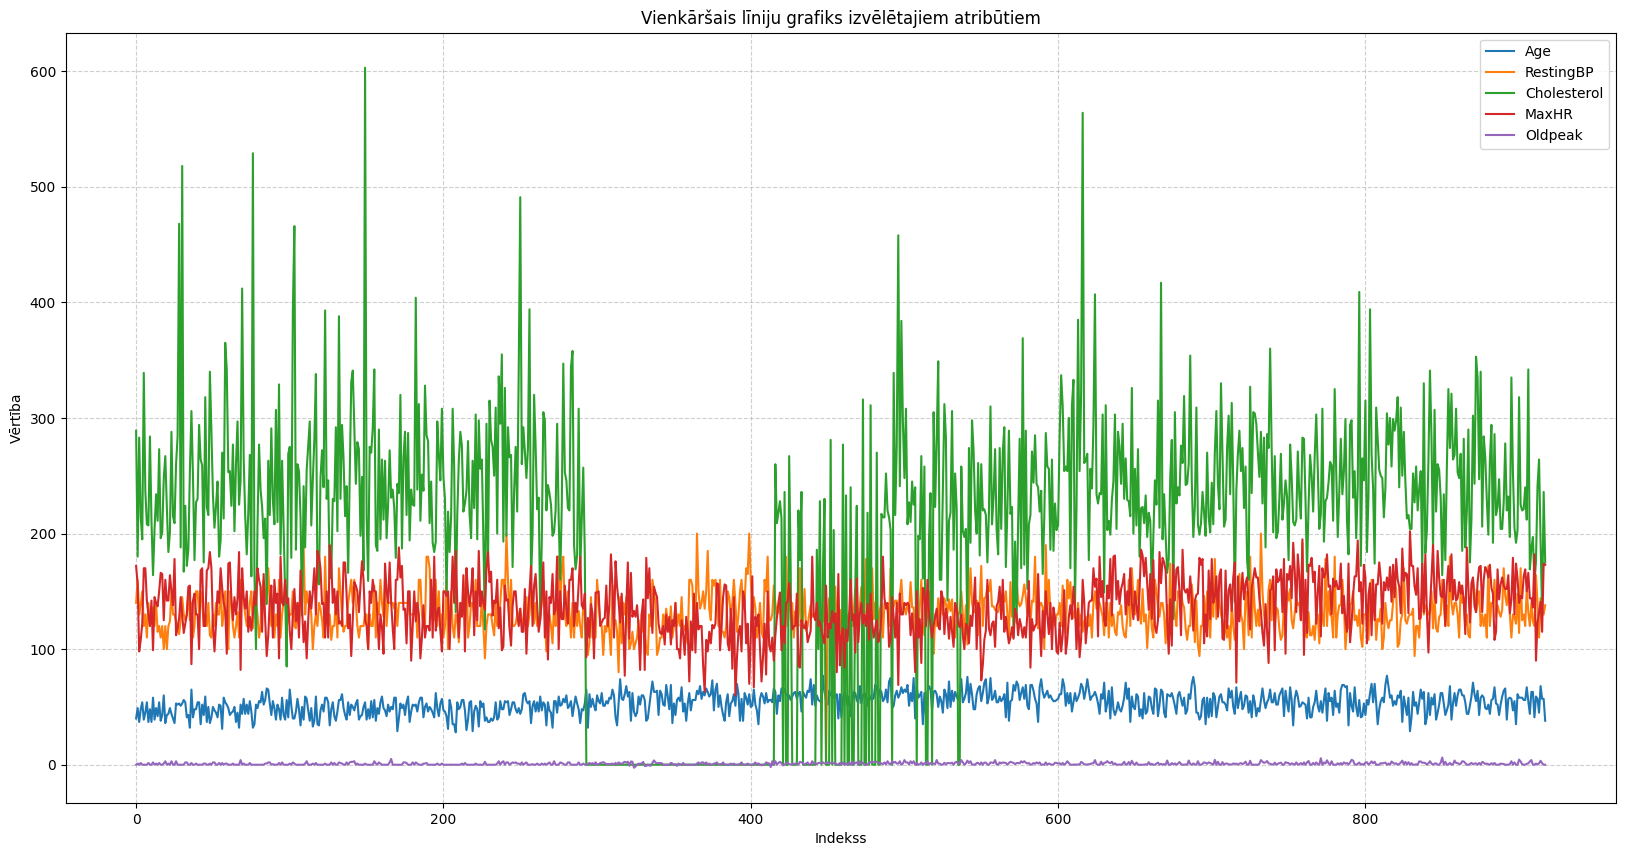

Veido histogrammas skaitliskajiem atribūtiem no jūsu saraksta: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease


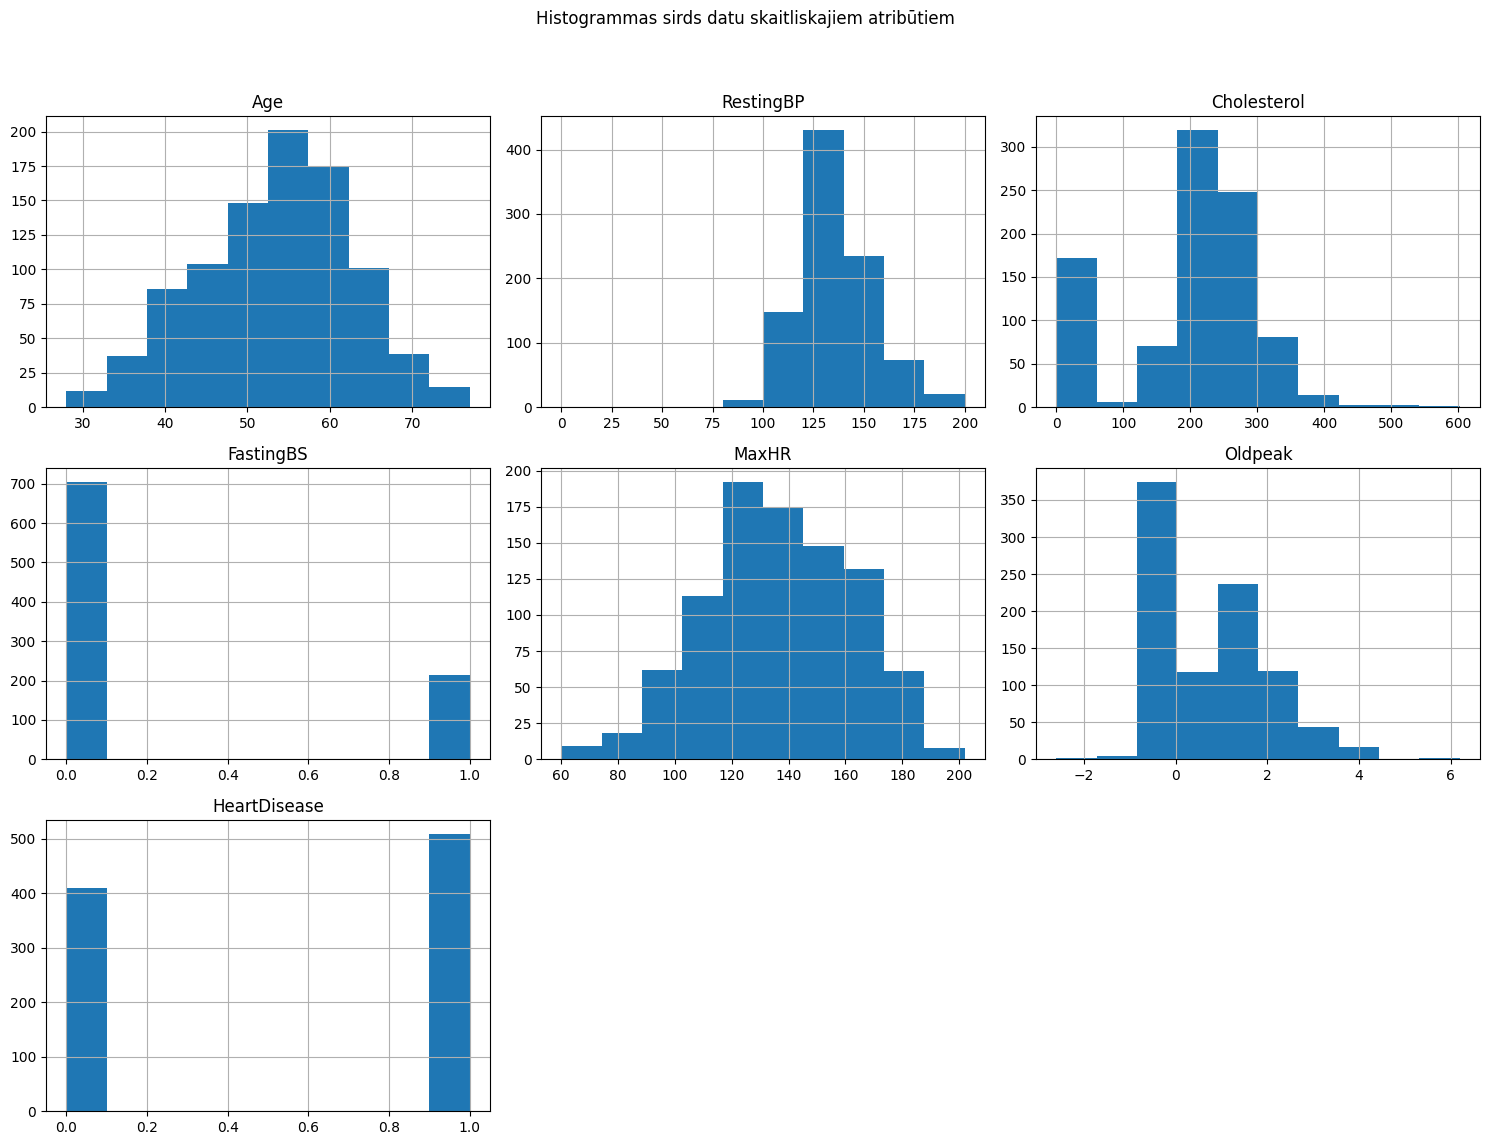


Šie atribūti ir kategoriski un tiem netika veidotas histogrammas ar .hist(): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
Varat izmantot seaborn.countplot vai pandas.value_counts().plot(kind='bar'), lai tos vizualizētu.

Pāru grafiki skaitliskajiem atribūtiem:
Veido pāru grafikus atribūtiem: Age, RestingBP, Cholesterol, MaxHR, Oldpeak


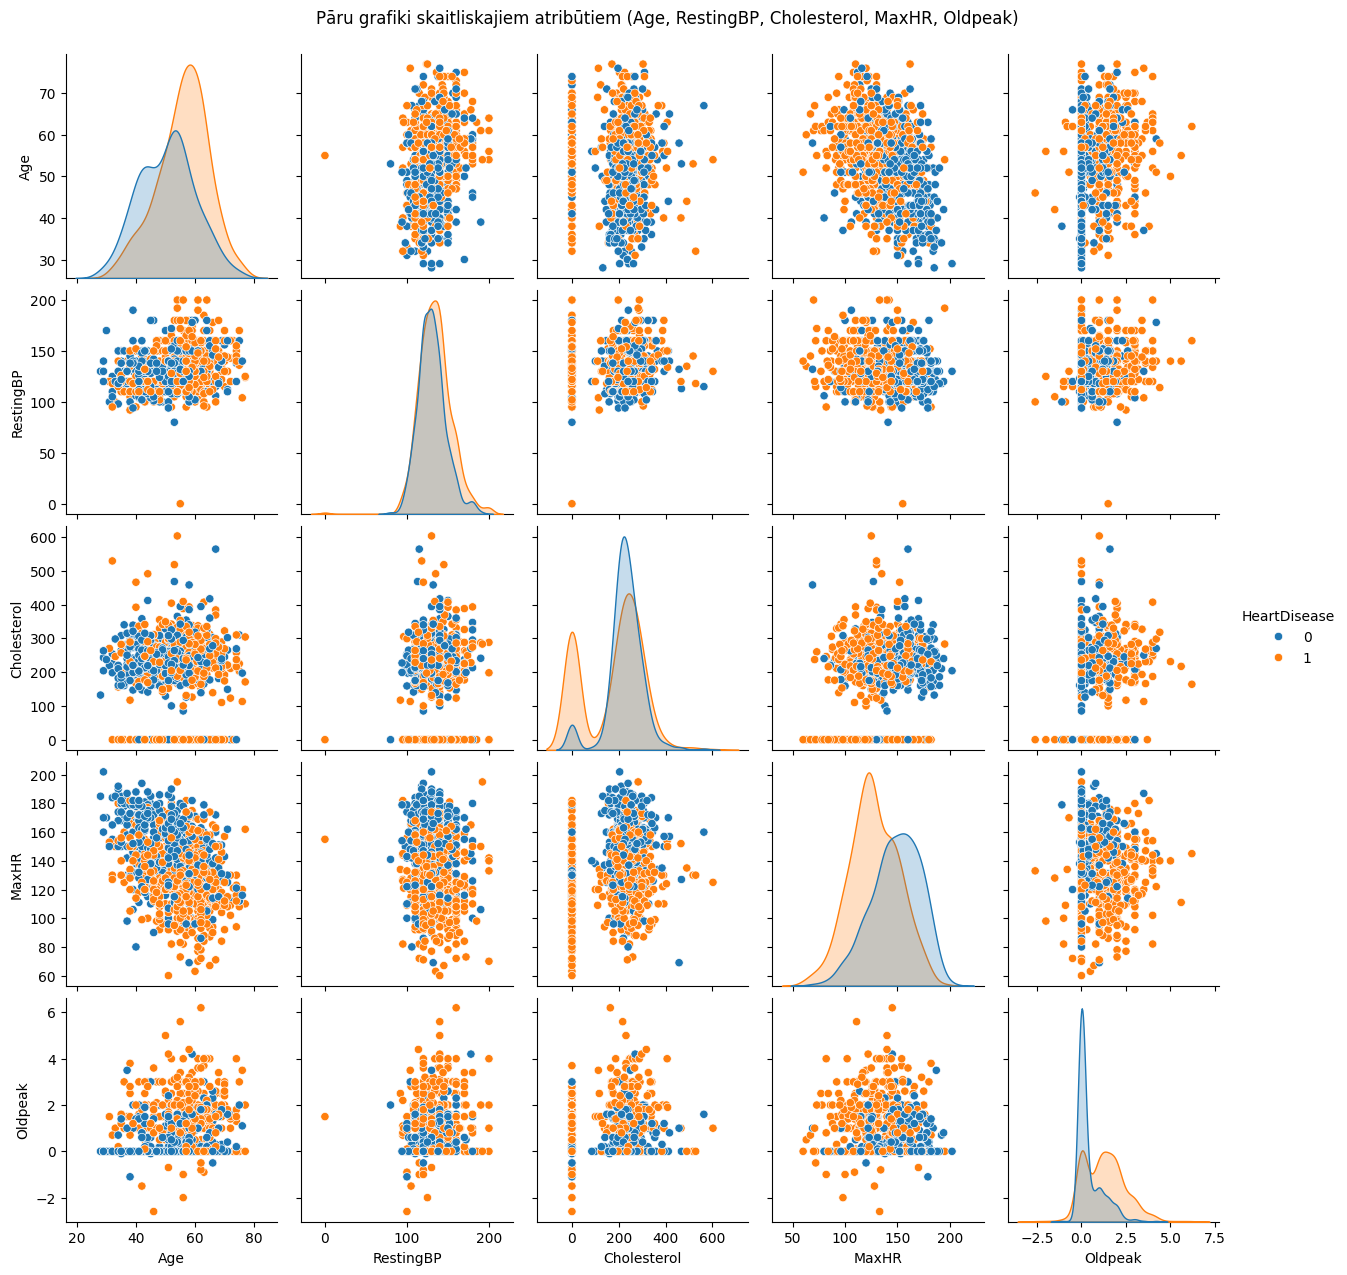

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'data' in locals() and data is not None and not data.empty:

    line_plot_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    required_line_features_exist = all(feature in data.columns for feature in line_plot_features)
    if required_line_features_exist:
        try:
            print(f"Veido līniju grafiku atribūtiem: {', '.join(line_plot_features)}")
            data_vizualizacijai_linija = data[line_plot_features]
            data_vizualizacijai_linija.plot(figsize=(20,10))
            plt.title('Vienkāršais līniju grafiks izvēlētajiem atribūtiem')
            plt.xlabel('Indekss')
            plt.ylabel('Vērtība')
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.show()
        except Exception as e:
            print(f"Neizdevās izveidot vienkāršo līniju grafiku: {e}")
    else:
        print(f"Datu kopā 'data' nav atrasti visi nepieciešamie atribūti vienkāršajam līniju grafikam: {', '.join(line_plot_features)}.")

    all_heart_features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
                          'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
                          'ST_Slope', 'HeartDisease']

    existing_heart_features = [f for f in all_heart_features if f in data.columns]
    numerical_heart_features = data[existing_heart_features].select_dtypes(include=['number']).columns.tolist()

    if numerical_heart_features:
        try:
            print(f"Veido histogrammas skaitliskajiem atribūtiem no jūsu saraksta: {', '.join(numerical_heart_features)}")
            data[numerical_heart_features].hist(figsize=(15, 12))
            plt.suptitle('Histogrammas sirds datu skaitliskajiem atribūtiem')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
        except Exception as e:
            print(f"Neizdevās izveidot histogrammas sirds datu skaitliskajiem atribūtiem: {e}")
    else:
        print("Nav atrasti skaitliski atribūti no jūsu saraksta, ko attēlot histogrammā.")

    categorical_heart_features = data[existing_heart_features].select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_heart_features:
        print(f"\nŠie atribūti ir kategoriski un tiem netika veidotas histogrammas ar .hist(): {', '.join(categorical_heart_features)}")
        print("Varat izmantot seaborn.countplot vai pandas.value_counts().plot(kind='bar'), lai tos vizualizētu.")

    complex_plot_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    target_column = 'HeartDisease'
    required_complex_features_exist = all(feature in data.columns for feature in complex_plot_features)
    if required_complex_features_exist:
        columns_to_viz_complex = complex_plot_features[:]
        has_target = False
        known_n_classes = None
        if target_column is not None and target_column in data.columns:
            columns_to_viz_complex.append(target_column)
            has_target = True
            try:
                known_n_classes = data[target_column].nunique()
                if known_n_classes is not None and known_n_classes > 10:
                    print(f"Brīdinājums: Mērķa kolonnā '{target_column}' ir {known_n_classes} unikālas vērtības. Histogrammu sadalīšana pa klasēm var nebūt skaidra.")
            except Exception as e:
                print(f"Neizdevās noteikt unikālo klašu skaitu mērķa kolonnā: {e}")
                known_n_classes = None
        data_for_pairplot = data[columns_to_viz_complex].dropna().copy()
        if has_target:
            data_for_pairplot[target_column] = data_for_pairplot[target_column].astype(str)
        data_for_hist_complex = data[complex_plot_features].copy()
        if has_target:
            data_for_hist_complex[target_column] = data[target_column].copy()

        print("\nPāru grafiki skaitliskajiem atribūtiem:")
        if not data_for_pairplot.empty and len(complex_plot_features) > 1:
            try:
                print(f"Veido pāru grafikus atribūtiem: {', '.join(complex_plot_features)}")
                g = sns.pairplot(data_for_pairplot, hue=target_column if has_target else None, diag_kind='kde')
                plt.suptitle(f'Pāru grafiki skaitliskajiem atribūtiem ({", ".join(complex_plot_features)})', y=1.02)
                if has_target:
                    g._legend.set_title(target_column)
                plt.show()
            except Exception as e:
                print(f"Neizdevās izveidot pāru grafikus: {e}")
        else:
            print("Nav pietiekami daudz skaitlisko atribūtu (vairāk nekā 1) vai datu (pēc tukšo vērtību izslēgšanas) pāru grafikiem.")

else:
    print("\nNav iespējams veikt nekādas vizualizācijas: datu kopa 'data' nav pieejama vai ir tukša.")

## Vizualizācija: Korelācijas Siltumkarte (Heatmap)

**Mērķis:** Korelācijas siltumkarte ir grafisks attēlojums korelācijas matricai, kas parāda divu vai vairāku mainīgo attiecību stiprumu un virzienu. Tā ir lielisks veids, kā vizuāli atklāt saistības starp pazīmēm datu kopā.

**Interpretācija:**
* **Vērtības:** Katrā šūnā ir korelācijas koeficients (parasti Pīrsona korelācijas koeficients), kas svārstās no -1 līdz 1.
    * **1:** Perfekta pozitīva korelācija (mainīgie pārvietojas vienā virzienā).
    * **-1:** Perfekta negatīva korelācija (mainīgie pārvietojas pretējos virzienos).
    * **0:** Nav lineāras korelācijas.
* **Krāsas:** Krāsu intensitāte un nokrāsa norāda korelācijas stiprumu un virzienu. Parasti siltākas krāsas (piemēram, dzeltena, oranža, sarkana) apzīmē pozitīvu korelāciju, bet vēsākas krāsas (piemēram, zila, zaļa, purpura) – negatīvu korelāciju. Jo spilgtāka krāsa, jo spēcīgāka korelācija.
* **Diagonāle:** Pa diagonāli vienmēr būs 1, jo mainīgais korelē perfekti ar sevi pašu.

**Ieguvumi:**
* Ātri identificēt stipri korelējošas pazīmes, kas var norādīt uz multikolinearitāti mašīnmācīšanās modeļos.
* Izprast mērķa mainīgā (piemēram, 'HeartDisease') korelāciju ar citām pazīmēm, kas palīdz pazīmju atlasē.

**Izmantotie atribūti:** 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease'.

Veido korelācijas siltumkarti atribūtiem: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease


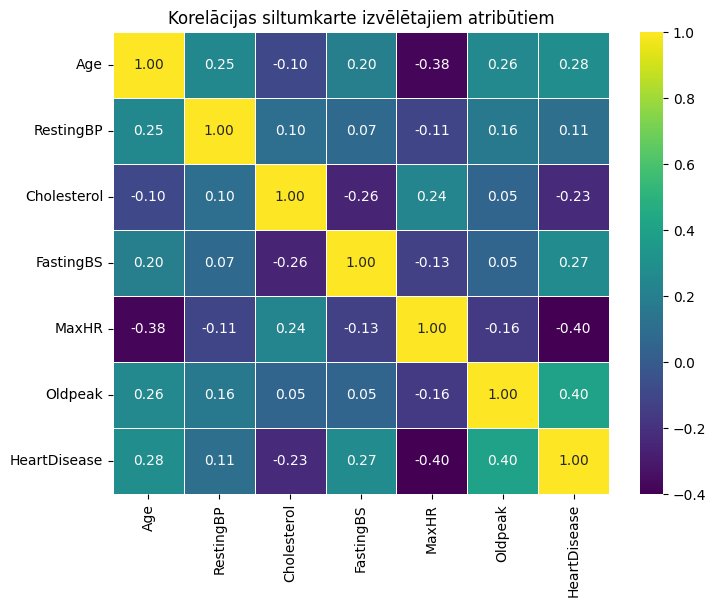

In [28]:
heatmap_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

if 'data' in locals() and data is not None and not data.empty:
    required_heatmap_features_exist = all(feature in data.columns for feature in heatmap_features)

    if required_heatmap_features_exist:
        try:
            print(f"Veido korelācijas siltumkarti atribūtiem: {', '.join(heatmap_features)}")
            corr_matrix = data[heatmap_features].corr()

            plt.figure(figsize=(8, 6))
            sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
            plt.title('Korelācijas siltumkarte izvēlētajiem atribūtiem')
            plt.show()
        except Exception as e:
            print(f"Neizdevās izveidot korelācijas siltumkarti: {e}")
    else:
        print(f"Datu kopā 'data' nav atrasti visi nepieciešamie atribūti korelācijas siltumkartei: {', '.join(heatmap_features)}. Siltumkarte netika veidota.")

else:
    print("Datu kopa 'data' nav pieejama vai ir tukša. Korelācijas siltumkarte netika veidota.")

## Nepārraudzītā Mašīnmācīšanās (Klasterizācija)

Nepārraudzītā mašīnmācīšanās ir mašīnmācīšanās apakšnozare, kurā algoritmi tiek apmācīti ar datiem, kas nav marķēti. Tās mērķis ir atklāt slēptas struktūras vai modeļus datos, piemēram, klasterus (grupas) ar līdzīgām datu pazīmēm. Šajā sadaļā mēs izmantosim divus populārus klasterizācijas algoritmus: Hierarhisko (Aglomeratīvo) klasterizāciju un K-Vidējo (K-Means) klasterizāciju.

**Svarīgi priekšnoteikumi:**
* Šis posms tiks izpildīts tikai tad, ja datu kopa `data` ir pieejama un nav tukša, un ja ir sagatavoti mērogoti dati (`X_scaled`).
* Parametrs `perform_clustering` nosaka, vai klasterizācijas analīze tiks veikta.

### Hierarhiskā (Aglomeratīvā) Klasterizācija

**Mērķis:** Veidot klasteru hierarhiju, apvienojot atsevišķus datu punktus mazākos klasteros un pēc tam šos klasterus lielākos klasteros, līdz tiek izveidots viens liels klasteris, kas ietver visus datu punktus.

**Darbība:**
1.  Sākumā katrs datu punkts tiek uzskatīts par atsevišķu klasteri.
2.  Pakāpeniski tiek apvienoti tuvākie klasteri, pamatojoties uz izvēlēto "savienošanas" (linkage) metodi (šajā gadījumā 'ward' metode, kas minimizē variācijas pievienojot klasterus).
3.  Šis process turpinās, līdz tiek sasniegts vēlamais klasteru skaits vai visi punkti ir apvienoti vienā klasterī.

**Apmācība un Novērtēšana:**
* Tiek testēti vairāki klasteru skaiti (piemēram, 2, 3, 4), lai novērtētu, kurš skaits labāk atbilst datiem.
* Tiek aprēķināta savienojumu (linkage) matrica, kas ir nepieciešama dendrogrammas (hierarhiskās struktūras vizualizācijas) zīmēšanai vēlāk.
* Tiek parādīts katrā klasterī iegūto objektu skaits.
* Ja ir pieejamas patiesās klases (`y_true`), tiek izveidota krusttabula, lai salīdzinātu klasterizācijas rezultātus ar patiesajām klasēm.
* Tiek aprēķināts **Silueta koeficients** – metrika, kas novērtē klasteru blīvumu un atdalāmību. Silueta koeficients svārstās no -1 līdz 1, kur augstākas vērtības norāda uz labāk definētiem klasteriem.

### K-Vidējo (K-Means) Klasterizācija

**Mērķis:** Sadalīt datu punktus `k` klasteros, kur katram datu punktam tiek piešķirts tas klasteris, kura centroīds (centrs) ir vistuvāk.

**Darbība:**
1.  Sākotnēji tiek nejauši izvēlēti `k` centroīdi.
2.  Katrs datu punkts tiek piešķirts tuvākajam centroīdam, izveidojot `k` klasterus.
3.  Tiek pārrēķināti katra klastera centroīdi, pamatojoties uz tajos esošajiem datu punktiem.
4.  Šie soļi tiek atkārtoti, līdz centroīdi vairs būtiski nemainās vai tiek sasniegts noteikts iterāciju skaits.

**Apmācība un Novērtēšana:**
* Tiek testētas dažādas `k` vērtības (klasteru skaits), lai atrastu optimālo skaitu.
* Tiek parādīts katrā klasterī iegūto objektu skaits.
* Tiek aprēķināts **Silueta koeficients** katrai `k` vērtībai, lai palīdzētu noteikt labāko klasteru skaitu. Grafiks ar Silueta koeficientiem ļauj vizuāli novērtēt, kurš `k` sniedz vislabāko klasterizāciju.
* Tiek saglabāti apmācītie K-Means modeļi (ar centroīdiem) vēlākai analīzei.

**Ņemiet vērā:** Abiem algoritmiem tiek izmantoti iepriekš mērogoti dati (`X_scaled`), kas ir būtiski, lai nodrošinātu vienlīdzīgu ietekmi visām pazīmēm uz klasterizācijas rezultātiem.


Nepārraudzītā Mašīnmācīšanās (Klasterizācija)

Algoritms: Hierarhiskā (Aglomeratīvā) Klasterizācija
Izmantotais savienošanas (linkage) metode: ward
Testējam šādu klasteru skaitu (Hierarchical): [2, 3, 4]

Apmāca Hierarchical Clustering uz pilniem mērogotiem datiem...
Aprēķina savienojumu (linkage) matricu dendrogrammai, izmantojot 'ward' metodi.
Savienojumu matricas forma: (917, 4)
Fito AgglomerativeClustering modeļus izvēlētajam klasteru skaitam...

 Eksperiments ar n_clusters = 2
  Iegūti klasteri: 2
  Objektu skaits katrā klasterī: {np.int64(0): np.int64(625), np.int64(1): np.int64(293)}
  Krusttabula ar patiesajām klasēm:
col_0           0    1
HeartDisease          
0             348   62
1             277  231

  -> Ziņojumā analizējiet, cik klasteri atbilst zināmajām klasēm (2).
  Silueta koeficients: 0.2409

 Eksperiments ar n_clusters = 3
  Iegūti klasteri: 3
  Objektu skaits katrā klasterī: {np.int64(0): np.int64(293), np.int64(1): np.int64(351), np.int64(2): np.int64(274)}


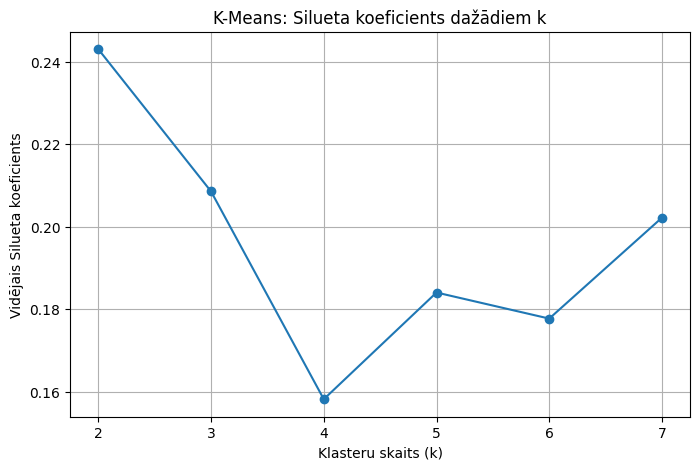


Labākā k vērtība pēc Silueta koeficienta: 2 (koeficients: 0.2430)

Klasterizācija PABEIGTA


In [29]:
import numpy as np
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

if 'data' in locals() and data is not None and not data.empty and perform_clustering:
    if 'X_scaled' not in locals() or X_scaled is None:
        print("\nKlasterizācija: IZLAISTA (X_scaled nav pieejams)")
    else:
        print("\nNepārraudzītā Mašīnmācīšanās (Klasterizācija)")

        print("\nAlgoritms: Hierarhiskā (Aglomeratīvā) Klasterizācija")

        linkage_method = 'ward'
        print(f"Izmantotais savienošanas (linkage) metode: {linkage_method}")

        cluster_counts_to_test_hierarchical = [2, 3, 4]

        if known_n_classes is not None and known_n_classes > 1 and known_n_classes not in cluster_counts_to_test_hierarchical:
            cluster_counts_to_test_hierarchical = sorted(list(set(cluster_counts_to_test_hierarchical + [known_n_classes])))
            print(f"Ņemot vērā zināmo klašu skaitu ({known_n_classes}), testējam šādu klasteru skaitu (Hierarchical): {cluster_counts_to_test_hierarchical}")
        else:
            print(f"Testējam šādu klasteru skaitu (Hierarchical): {cluster_counts_to_test_hierarchical}")

        hierarchical_results = {}
        linkage_matrix = None
        print("\nApmāca Hierarchical Clustering uz pilniem mērogotiem datiem...")
        try:
            if X_scaled.shape[0] > 1:
                print(f"Aprēķina savienojumu (linkage) matricu dendrogrammai, izmantojot '{linkage_method}' metodi.")
                linkage_matrix = linkage(X_scaled, method=linkage_method, metric='euclidean')
                print(f"Savienojumu matricas forma: {linkage_matrix.shape}")
            else:
                print("Nevar aprēķināt savienojumu matricu: Nav pietiekami daudz objektu.")

            print("Fito AgglomerativeClustering modeļus izvēlētajam klasteru skaitam...")
            for n_clust in cluster_counts_to_test_hierarchical:
                print(f"\n Eksperiments ar n_clusters = {n_clust}")
                try:
                    h_clustering = AgglomerativeClustering(n_clusters=n_clust, linkage=linkage_method, metric='euclidean')
                    labels = h_clustering.fit_predict(X_scaled)
                    hierarchical_results[n_clust] = labels

                    unique_labels, counts = np.unique(labels, return_counts=True)
                    print(f"  Iegūti klasteri: {len(unique_labels)}")
                    print(f"  Objektu skaits katrā klasterī: {dict(zip(unique_labels, counts))}")

                    if y_true is not None:
                        print("  Krusttabula ar patiesajām klasēm:")
                        print(pd.crosstab(y_true, labels))
                        print(f"\n  -> Ziņojumā analizējiet, cik klasteri atbilst zināmajām klasēm ({known_n_classes}).")
                    else:
                        print("  -> Patiesās klases nav zināmas. Novērtēšana pēc sakritības ar patiesajām etiķetēm nav iespējama.")

                    if n_clust > 1 and X_scaled.shape[0] > n_clust:
                        if len(unique_labels) == n_clust and min(counts) >= 1:
                            try:
                                score = silhouette_score(X_scaled, labels, metric='euclidean')
                                print(f"  Silueta koeficients: {score:.4f}")
                            except Exception as e:
                                print(f"  Neizdevās aprēķināt Silueta koeficientu n_clusters={n_clust}: {e}")
                        else:
                            print(f"  Neiespējami aprēķināt Silueta koeficientu n_clusters={n_clust} (kāds klasteris ir tukšs vai ir problēmas ar klasteru skaitu).")
                    else:
                        print(f"  Neiespējami aprēķināt Silueta koeficientu n_clusters={n_clust} (nepietiekamu nosacījumu dēļ).")

                except Exception as e:
                    print(f"  Radās kļūda, izpildot eksperimentu ar n_clusters={n_clust}: {e}")
                    hierarchical_results[n_clust] = None

        except Exception as e:
            print(f"Radās kļūda Hierarhiskās klasterizācijas apmācības posmā: {e}")


        print("\nAlgoritms: K-Vidējo (K-Means) Klasterizācija")

        k_values_to_test_kmeans = range(2, 8)

        if known_n_classes is not None and known_n_classes > 1 and known_n_classes not in k_values_to_test_kmeans:
            k_values_to_test_kmeans = sorted(list(set(list(k_values_to_test_kmeans) + [known_n_classes])))
            print(f"Ņemot vērā zināmo klašu skaitu ({known_n_classes}), testējam šādas k vērtības (K-Means): {list(k_values_to_test_kmeans)}")
        else:
            print(f"Testējam šādas k vērtības (K-Means): {list(k_values_to_test_kmeans)}")

        silhouette_scores = {}
        kmeans_results = {}
        kmeans_models = {}


        print("\nApmāca K-Means uz pilniem mērogotiem datiem un aprēķina Silhouette Score:")
        for k in k_values_to_test_kmeans:
            print(f"\n Eksperiments ar k = {k}")

            try:
                kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
                labels = kmeans.fit_predict(X_scaled)
                kmeans_results[k] = labels
                kmeans_models[k] = kmeans

                unique_labels, counts = np.unique(labels, return_counts=True)
                print(f"  Iegūti klasteri: {len(unique_labels)}")
                print(f"  Objektu skaits katrā klasterī: {dict(zip(unique_labels, counts))}")

                if k > 1 and X_scaled.shape[0] > k:
                    if len(unique_labels) == k and min(counts) >= 1:
                        try:
                            score = silhouette_score(X_scaled, labels, metric='euclidean')
                            silhouette_scores[k] = score
                            print(f"  Silueta koeficients: {score:.4f}")
                        except Exception as e:
                            print(f"  Neizdevās aprēķināt Silueta koeficientu k={k}: {e}")
                            silhouette_scores[k] = -2
                    else:
                        print(f"  Neiespējami aprēķināt Silueta koeficientu k={k} (kāds klasteris ir tukšs vai ir problēmas ar klasteru skaitu).")
                        silhouette_scores[k] = -2

                else:
                    print(f"  Neiespējami aprēķināt Silueta koeficientu k={k} (nepietiekamu nosacījumu dēļ).")
                    silhouette_scores[k] = -2

            except Exception as e:
                print(f"  Radās kļūda, izpildot eksperimentu ar k={k}: {e}")
                kmeans_results[k] = None
                kmeans_models[k] = None
                silhouette_scores[k] = -2


        if silhouette_scores and any(score > -2 for score in silhouette_scores.values()):
            plt.figure(figsize=(8, 5))
            valid_k_values = sorted([k for k, score in silhouette_scores.items() if score > -2])
            valid_scores = [silhouette_scores[k] for k in valid_k_values]
            plt.plot(valid_k_values, valid_scores, marker='o')
            plt.title('K-Means: Silueta koeficients dažādiem k')
            plt.xlabel('Klasteru skaits (k)')
            plt.ylabel('Vidējais Silueta koeficients')
            plt.xticks(valid_k_values)
            plt.grid(True)
            plt.show()

            valid_scores_dict = {k: score for k, score in silhouette_scores.items() if score > -2}
            if valid_scores_dict:
                best_k_silhouette = max(valid_scores_dict, key=valid_scores_dict.get)
                print(f"\nLabākā k vērtība pēc Silueta koeficienta: {best_k_silhouette} (koeficients: {valid_scores_dict[best_k_silhouette]:.4f})")
            else:
                print("\nNeizdevās atrast labāko k vērtību pēc Silueta koeficienta starp testētajām vērtībām.")


        print("\nKlasterizācija PABEIGTA")

else:
    if 'data' not in locals() or data is None or data.empty:
        print("\nKlasterizācija: IZLAISTA (Datu kopa 'data' nav pieejama vai ir tukša)")
    elif 'X_scaled' not in locals() or X_scaled is None:
        print("\nKlasterizācija: IZLAISTA (X_scaled nav pieejams)")
    elif not perform_clustering:
        print("\nKlasterizācija: IZLAISTA (perform_clustering=False)")

## Vizualizācija: Klasterizācijas rezultātu attēlošana (Izkliedes grafiks)

**Mērķis:** Pēc klasterizācijas algoritmu izpildes ir svarīgi vizualizēt iegūtos klasterus, lai gūtu intuitīvu izpratni par datu struktūru un modeļa efektivitāti. Izkliedes grafiks ļauj attēlot datu punktus un to piederību klasteriem, kā arī klasteru centroīdus.

**Svarīgi priekšnoteikumi:**
* Šis posms tiks izpildīts tikai tad, ja datu kopa `data` ir pieejama un nav tukša, ja ir sagatavoti mērogoti dati (`X_scaled`), un ja ir pieejami K-Means klasterizācijas rezultāti (`kmeans_results`) un apmācītie modeļi (`kmeans_models`).
* Grafiku var zīmēt tikai tad, ja `X_scaled` ir vismaz divas dimensijas/stabiņi, jo izkliedes grafikam nepieciešamas X un Y asu koordinātes.
* Parametrs `perform_clustering` nosaka, vai vizualizācija tiks veikta.

**Vizualizācijas detaļas:**
* **Dimensijas:** Tā kā grafiku var attēlot tikai divās dimensijās, tiek izmantotas pirmās divas `X_scaled` datu kopas dimensijas. Ja sākotnēji datiem ir vairāk par divām dimensijām, tiek parādīts to projicējums uz šīm divām asīm.
* **Krāsu kartēšana:** Katrs datu punkts tiek iekrāsots atbilstoši tam piešķirtajai klastera etiķetei, izmantojot krāsu karti (piemēram, 'viridis'). Tas ļauj vizuāli atšķirt dažādus klasterus.
* **Centroīdi:** K-Means klasteru centroīdi tiek attēloti kā atsevišķi marķieri (šajā gadījumā – zaļi kvadrāti), kas norāda katra klastera centru. Tas palīdz saprast klasteru izvietojumu un to, ap kuriem punktiem centri ir koncentrēti.
* **Ass etiķetes:** Asis tiek apzīmētas kā "Pirmā dimensija (Mērogots)" un "Otrā dimensija (Mērogots)", norādot, ka tiek izmantoti mērogoti dati.

**Ieguvumi:**
* Vizualizācija palīdz novērtēt klasteru "dabiskumu" un atdalāmību.
* Tā var atklāt, vai klasteri pārklājas vai ir skaidri atdalīti.
* Palīdz izvēlēties labāko klasteru skaitu, ja tas nav iepriekš zināms, meklējot klasterus, kas ir blīvi un atdalīti no citiem.

Šī šūna iterēs cauri iepriekš noteiktam `k` vērtību sarakstam (`k_to_visualize_list`), lai katrai no tām ģenerētu atsevišķu izkliedes grafiku, parādot K-Means klasterizācijas rezultātus.

Mēģina attēlot K-Means klasterizācijas rezultātus.


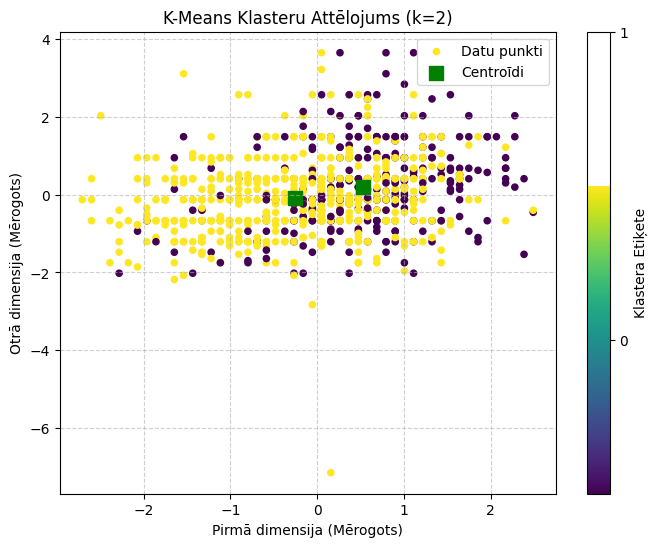

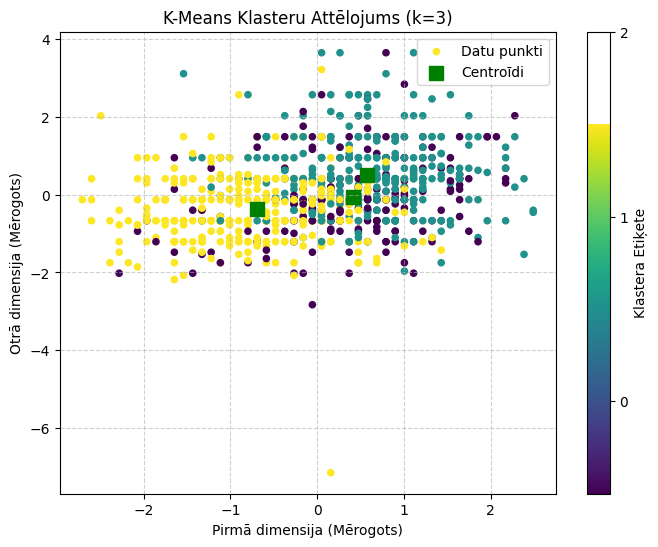

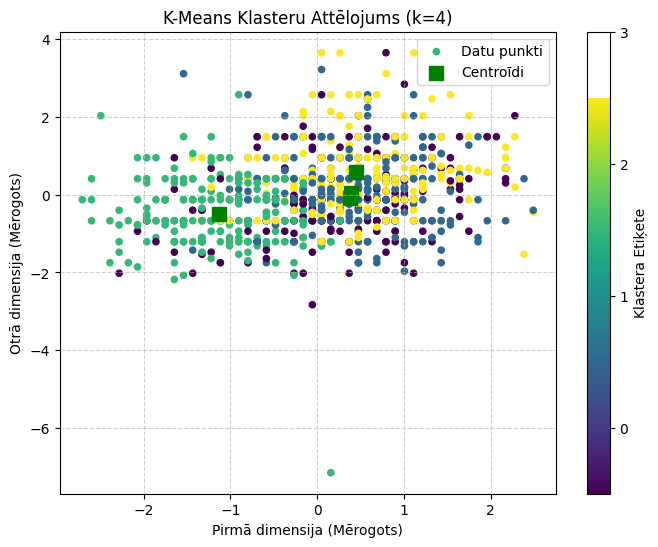


Klasterizācijas rezultātu attēlošana PABEIGTA.


In [30]:
import matplotlib.pyplot as plt
import numpy as np

k_to_visualize_list = [2, 3, 4]

if 'data' in locals() and data is not None and not data.empty and perform_clustering:
    if 'X_scaled' not in locals() or X_scaled is None:
        print("Klasterizācijas rezultātu attēlošana: IZLAISTA (X_scaled nav pieejams).")
    elif 'kmeans_results' not in locals() or not kmeans_results or 'kmeans_models' not in locals() or not kmeans_models:
        print("Klasterizācijas rezultātu attēlošana: IZLAISTA (K-Means rezultāti vai modeļi nav pieejami).")
    elif X_scaled.shape[1] < 2:
        print("Klasterizācijas rezultātu attēlošana: IZLAISTA (X_scaled ir mazāk par 2 dimensijām/stabiņiem).")
    else:
        print("Mēģina attēlot K-Means klasterizācijas rezultātus.")

        x_axis_data = X_scaled[:, 0]
        y_axis_data = X_scaled[:, 1]

        xlabel = "Pirmā dimensija (Mērogots)"
        ylabel = "Otrā dimensija (Mērogots)"

        plotted_any = False
        for k_val in k_to_visualize_list:
            if k_val in kmeans_results and kmeans_results[k_val] is not None:
                try:
                    labels = kmeans_results[k_val]
                    centroids_to_plot = None
                    if k_val in kmeans_models and kmeans_models[k_val] is not None:
                        centroids = kmeans_models[k_val].cluster_centers_
                        if centroids.shape[1] >= 2:
                            centroids_to_plot = centroids[:, :2]
                        else:
                            print(f"  Brīdinājums: K-Means modeļa (k={k_val}) centroīdiem nav pietiekami daudz dimensiju attēlošanai (nepieciešamas vismaz 2).")


                    plt.figure(figsize=(8, 6))
                    scatter = plt.scatter(x_axis_data, y_axis_data, c=labels, s=20, cmap='viridis', label='Datu punkti')
                    if centroids_to_plot is not None:
                        plt.scatter(centroids_to_plot[:, 0], centroids_to_plot[:, 1], c='green', s=100, marker='s', label='Centroīdi')
                        plt.legend()

                    plt.title(f'K-Means Klasteru Attēlojums (k={k_val})')
                    plt.xlabel(xlabel)
                    plt.ylabel(ylabel)
                    if len(np.unique(labels)) > 1:
                        cbar = plt.colorbar(scatter, label='Klastera Etiķete')
                        tick_locs = np.arange(len(np.unique(labels)))
                        cbar.set_ticks(tick_locs + 0.5)
                        cbar.set_ticklabels(np.unique(labels))


                    plt.grid(True, linestyle='--', alpha=0.6)
                    plt.show()
                    plotted_any = True

                except Exception as e:
                    print(f"  Neizdevās attēlot K-Means rezultātu ar k={k_val}: {e}")

        if not plotted_any:
            print("Netika atrasti veiksmīgi K-Means rezultāti vizualizācijai pie norādītajiem k vērtībām.")
        else:
            print("\nKlasterizācijas rezultātu attēlošana PABEIGTA.")

else:
    print("Klasterizācijas rezultātu attēlošana: IZLAISTA (nav pietiekamu nosacījumu).")

## Vizualizācija: Aglomeratīvās Klasterizācijas Dendrogramma

**Mērķis:** Dendrogramma ir koku diagramma, kas vizualizē Hierarhiskās (Aglomeratīvās) klasterizācijas rezultātus. Tā parāda, kā individuālie datu punkti tiek pakāpeniski apvienoti klasteros, veidojot hierarhisku struktūru. Tā ir būtiska, lai saprastu klasteru veidošanās procesu un noteiktu optimālo klasteru skaitu, vizuāli analizējot "zarus" un to garumus.

**Svarīgi priekšnoteikumi:**
* Šī šūna tiks izpildīta tikai tad, ja `linkage_matrix` ir veiksmīgi aprēķināta iepriekšējā nepārraudzītās mašīnmācīšanās posmā (4. sadaļā). `linkage_matrix` satur informāciju par klasteru apvienošanās secību un attālumiem.

**Vizualizācijas detaļas:**
* **Apmācības rezultāts:** Dendrogramma tiek veidota, izmantojot `linkage_matrix`, kas ir rezultāts no hierarhiskās klasterizācijas apmācības.
* **Asis:**
    * X ass parasti attēlo objektu indeksus vai klasteru lielumu (ja tiek izmantota apgriešanas funkcija). Katra "lapa" dendrogrammas apakšā sākotnēji ir atsevišķs datu punkts.
    * Y ass attēlo attālumu (vai disimilaritāti), pie kura divi klasteri vai datu punkti tika apvienoti. Augstāki savienojumu līmeņi norāda uz lielāku atšķirību starp apvienotajiem klasteriem.
* **Apgriešana (`truncate_mode`):** Lielām datu kopām dendrogramma var kļūt ļoti blīva un grūti salasāma. Parametrs `truncate_mode='lastp'` ļauj vizualizēt tikai pēdējos `p` apvienojumus, efektīvi "apgriežot" dendrogrammas apakšdaļu un parādot galvenos klasterus augšpusē. `p_value` nosaka parādīto "lapu" skaitu. Šī vērtība ir pielāgojama, lai atrastu optimālu detalizācijas pakāpi.
* **Linkage metode:** Virsrakstā tiek norādīta izmantotā savienošanas (linkage) metode (piemēram, 'ward'), kas ietekmē to, kā tiek aprēķināti attālumi starp klasteriem un kā tie tiek apvienoti.

**Ieguvumi:**
* **Klasteru skaita noteikšana:** Dendrogramma palīdz vizuāli noteikt optimālo klasteru skaitu. Jūs varat meklēt lielus vertikālus "zarus" dendrogrammā – ja jūs "nogriežat" dendrogrammu horizontāli vietā, kur ir garš atdalījums, tad iegūtais vertikālo līniju skaits norādīs uz klasteru skaitu.
* **Klasteru struktūras izpratne:** Tā sniedz informāciju par datu dabiskajām grupām un to hierarhisko attiecību.

Šī šūna automātiski pielāgos `p_value` atkarībā no datu kopas lieluma, lai nodrošinātu optimālu vizualizāciju.

Mēģina attēlot dendrogrammu no aprēķinātās saistību matricas.
Pieejams X_scaled (918 objekti), pielāgo p_value līdz 50.
Attēlo dendrogrammu, apgriežot uz pēdējiem 50 'lapām' (truncate_mode='lastp').


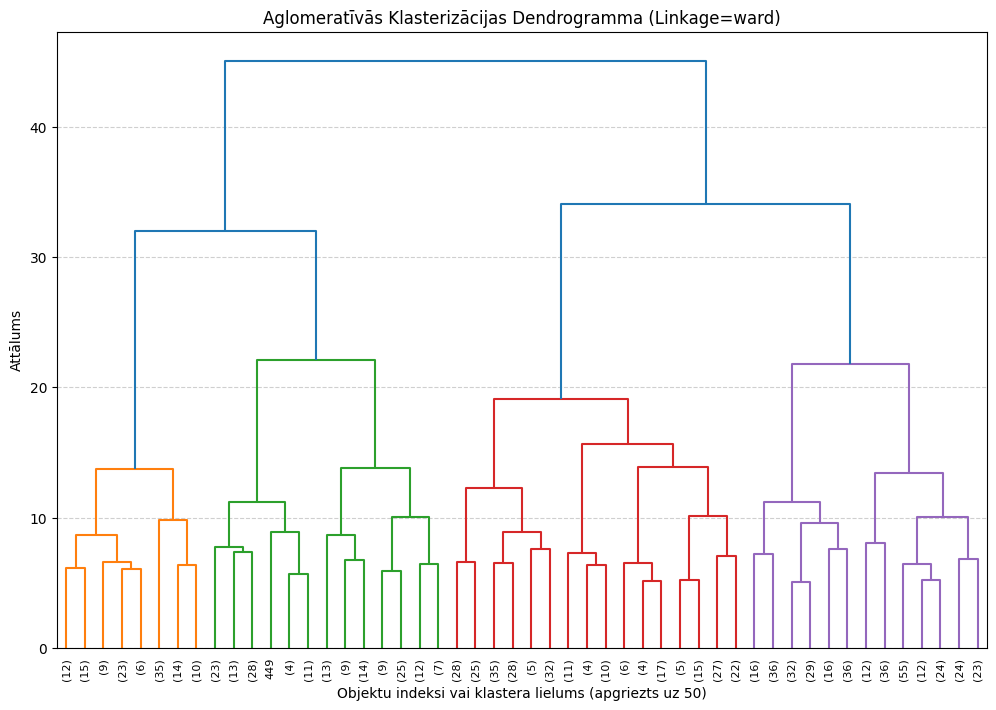


Dendrogramma PABEIGTA.


In [31]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np # Ensure numpy is imported

# Šī šūna attēlo dendrogrammu, kas veidota, balstoties uz Hierarhiskās klasterizācijas (Aglomeratīvās) apmācības rezultātiem.

if 'linkage_matrix' in locals() and linkage_matrix is not None and linkage_matrix.shape[0] > 0:
    print("Mēģina attēlot dendrogrammu no aprēķinātās saistību matricas.")
    try:
        plt.figure(figsize=(12, 8))

        p_value = 50 # Varat mainīt šo vērtību

        if 'X_scaled' in locals() and X_scaled is not None:
            p_value = min(p_value, X_scaled.shape[0])
            print(f"Pieejams X_scaled ({X_scaled.shape[0]} objekti), pielāgo p_value līdz {p_value}.")
        else:
            p_value = min(p_value, linkage_matrix.shape[0] + 1)
            print(f"X_scaled nav pieejams, izmantojot p_value = {p_value}.")

        print(f"Attēlo dendrogrammu, apgriežot uz pēdējiem {p_value} 'lapām' (truncate_mode='lastp').")

        dendrogram(linkage_matrix,
                   truncate_mode='lastp',
                   p=p_value,
                   leaf_rotation=90.,
                   leaf_font_size=8.
                  )

        linkage_method_display = linkage_method if 'linkage_method' in locals() else 'Nezināma metode'

        plt.title(f'Aglomeratīvās Klasterizācijas Dendrogramma (Linkage={linkage_method_display})')
        plt.xlabel(f'Objektu indeksi vai klastera lielums (apgriezts uz {p_value})')
        plt.ylabel('Attālums')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()
        print("\nDendrogramma PABEIGTA.")

    except Exception as e:
        print(f"Neizdevās izveidot dendrogrammu: {e}")
else:
    print("Dendrogramma: IZLAISTA (linkage_matrix nav pieejama no iepriekšējā klasterizācijas posma vai ir tukša).")

## Datu sagatavošana Neironu Tīklam: Iezīmes ('darba_datu_kopa_klasterizacijai_3_pazimes') un Mērķis ('izejas')

**Mērķis:** Šī šūna ir kritisks posms, kurā tiek sagatavoti ievaddati (iezīmes jeb neatkarīgie mainīgie, apzīmēti kā `X` un definēti kā `darba_datu_kopa_klasterizacijai_3_pazimes`) un izvaddati (mērķa mainīgais jeb atkarīgais mainīgais, apzīmēts kā `y` un definēts kā `izejas`) neironu tīkla (MLPClassifier) apmācībai. Ir ārkārtīgi svarīgi, lai jūs **pielāgotu šo kodu saviem datiem un jūsu izvēlētajām iezīmēm un mērķa mainīgajam.**

**Svarīgi priekšnoteikumi un pielāgojumi:**
* **Datu avots:** Kods pieņem, ka jūsu sākotnējie dati ir ielādēti `data` DataFrame (parasti no 2. šūnas).
* **Iezīmju atlase:** Jums ir jādefinē saraksts ar stabiņu nosaukumiem, kurus vēlaties izmantot kā ievades iezīmes neironu tīklam. Šis saraksts jāpiešķir mainīgajam `feature_columns_for_nn`. **Piemērs šūnā satur sirds datu iezīmes; jums tas jāaizvieto ar attiecīgajiem stabiņu nosaukumiem no jūsu datu kopas.**
* **Mērķa atlase:** Jums ir jādefinē viena stabiņa nosaukums, kas būs neironu tīkla prognozējamais mērķa mainīgais. Šis nosaukums jāpiešķir mainīgajam `target_column_for_nn`. **Piemērs šūnā satur `'HeartDisease'` kā mērķi; jums tas jāaizvieto ar attiecīgo stabiņa nosaukumu no jūsu datu kopas.**
* **Datu priekšapstrāde:** Lai neironu tīkls darbotos optimāli, dati bieži vien ir jāapstrādā. Šīs šūnas "JŪSU KODS ŠEIT!" sadaļā ir jāpievieno šādi soļi:
    * **Trūkstošo vērtību apstrāde:** Ja jūsu izvēlētajās iezīmēs vai mērķa mainīgajā ir trūkstošās vērtības (NaN), tās ir jāapstrādā (piemēram, aizpildot ar vidējo vērtību, mediānu vai izmetot rindas/stabiņus).
    * **Kategorisko iezīmju kodēšana:** Ja jūsu izvēlēto iezīmju vidū ir kategoriskas vērtības (teksts vai specifiski skaitļi, kas apzīmē kategorijas, piemēram, dzimums, krāsa), tās ir jāpārveido skaitliskā formātā (piemēram, izmantojot `OneHotEncoder` vai `LabelEncoder`).
    * **Skaitlisko iezīmju mērogošana:** **Tas ir ārkārtīgi svarīgi neironu tīkliem.** Tā kā neironu tīkli ir jutīgi pret ievades datu mērogu, skaitliskās iezīmes ir jāmērogo (piemēram, izmantojot `StandardScaler` vai `MinMaxScaler`), lai tām būtu līdzīgs vērtību diapazons.

**Rezultāts:**
Pēc šīs šūnas izpildes mainīgajiem `darba_datu_kopa_klasterizacijai_3_pazimes` (iezīmes) un `izejas` (mērķis) ir jābūt definētiem un jāietver jūsu sagatavotie dati. Tie tiks izmantoti nākamajā šūnā (datu sadalīšanā).

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Paraugs skalēšanai

darba_datu_kopa_klasterizacijai_3_pazimes = None
izejas = None

if 'data' in locals() and isinstance(data, pd.DataFrame) and not data.empty:
    try:
        feature_columns_for_nn = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
        target_column_for_nn = 'HeartDisease'

        all_required_nn_columns_exist = all(col in data.columns for col in feature_columns_for_nn) and target_column_for_nn in data.columns

        if all_required_nn_columns_exist:
            X_data_raw = data[feature_columns_for_nn].copy()
            y_data_raw = data[target_column_for_nn].copy()

            # JŪSU KODS ŠEIT, LAI SAGATAVOTU DATUS
            # Piemēram, trūkstošo vērtību apstrāde (ja ir)
            # X_data_raw.fillna(X_data_raw.mean(), inplace=True)

            # Piemēram, kategorisko iezīmju kodēšana (ja ir)
            # from sklearn.preprocessing import OneHotEncoder
            # encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            # categorical_cols = X_data_raw.select_dtypes(include=['object', 'category']).columns
            # encoded_features = encoder.fit_transform(X_data_raw[categorical_cols])
            # X_data_raw = X_data_raw.drop(columns=categorical_cols)
            # X_data_raw = pd.concat([X_data_raw.reset_index(drop=True), pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

            # Piemēram, skaitlisko iezīmju mērogošana
            # scaler_nn = StandardScaler()
            # X_scaled_for_nn = scaler_nn.fit_transform(X_data_raw)
            # darba_datu_kopa_klasterizacijai_3_pazimes = pd.DataFrame(X_scaled_for_nn, columns=X_data_raw.columns)
            # Ja izmantojat mērogošanu, tad piešķiriet mērogoto versiju
            darba_datu_kopa_klasterizacijai_3_pazimes = X_data_raw # Aizvietojiet ar mērogotiem/apstrādātiem datiem, ja veicat priekšapstrādi
            izejas = y_data_raw

            print("Mainīgie 'darba_datu_kopa_klasterizacijai_3_pazimes' un 'izejas' mēģināti sagatavot.")
            if darba_datu_kopa_klasterizacijai_3_pazimes is not None and izejas is not None:
                print(f"  'darba_datu_kopa_klasterizacijai_3_pazimes' forma: {darba_datu_kopa_klasterizacijai_3_pazimes.shape if hasattr(darba_datu_kopa_klasterizacijai_3_pazimes, 'shape') else 'Nav formas'}")
                print(f"  'izejas' forma: {izejas.shape if hasattr(izejas, 'shape') else 'Nav formas'}")
            else:
                print("  BRĪDINĀJUMS: Mainīgie netika definēti vai ir None sagatavošanas blokā.")

        else:
            print("BRĪDINĀJUMS: Datu kopā 'data' nav atrasti nepieciešamie stabiņi neironu tīkla sagatavošanai.")
            darba_datu_kopa_klasterizacijai_3_pazimes = None
            izejas = None

    except Exception as e:
        print(f"Kļūda mainīgo 'darba_datu_kopa_klasterizacijai_3_pazimes' un 'izejas' sagatavošanas laikā: {e}")
        darba_datu_kopa_klasterizacijai_3_pazimes = None
        izejas = None
else:
    print("BRĪDINĀJUMS: Datu kopa 'data' nav pieejama vai nav derīgs DataFrame. Nevar sākt neironu tīkla mainīgo sagatavošanu.")
    darba_datu_kopa_klasterizacijai_3_pazimes = None
    izejas = None

Mainīgie 'darba_datu_kopa_klasterizacijai_3_pazimes' un 'izejas' mēģināti sagatavot.
  'darba_datu_kopa_klasterizacijai_3_pazimes' forma: (918, 5)
  'izejas' forma: (918,)


## Neironu Tīkla Apmācība: Datu Sadalīšana un Modeļa Definēšana

**Mērķis:** Šajā posmā tiek veikti divi galvenie soļi mašīnmācīšanās modeļa apmācībai:
1.  **Datu sadalīšana:** Sākotnējā datu kopa (iezīmes un mērķa mainīgais) tiek sadalīta apmācības un testēšanas kopās. Apmācības kopa tiek izmantota modeļa "mācīšanai", savukārt testēšanas kopa tiek izmantota, lai novērtētu modeļa veiktspēju uz iepriekš neredzētiem datiem.
2.  **Neironu tīkla definēšana un apmācība:** Tiek inicializēts un apmācīts mākslīgais neironu tīkls (MLPClassifier) klasifikācijas uzdevumam.

**Svarīgi priekšnoteikumi:**
* Mainīgajiem `darba_datu_kopa_klasterizacijai_3_pazimes` (iezīmes X) un `izejas` (mērķis y) ir jābūt definētiem un aizpildītiem no iepriekšējās datu sagatavošanas šūnas (5. sadaļa).

### Datu sadalīšana apmācībai un testēšanai

* **Proporcija:** Dati tiek sadalīti noteiktā proporcijā – parasti 70% apmācībai un 30% testēšanai (parametrs `test_size=0.3`).
* **`random_state`:** Parametrs `random_state=42` nodrošina, ka datu sadalījums ir reproducējams. Tas nozīmē, ka katru reizi, kad izpildāt kodu, sadalījums būs identisks, kas ir svarīgi eksperimentu konsekvencei.
* **`stratify`:** Šis parametrs ir īpaši svarīgs klasifikācijas uzdevumiem. Ja `stratify=y` tiek norādīts, `train_test_split` nodrošina, ka katrā datu kopā (apmācības un testēšanas) mērķa klašu sadalījums ir līdzīgs sākotnējā datu kopā esošajam sadalījumam. Tas palīdz izvairīties no situācijām, kad, piemēram, viena klase ir pārsvarā tikai testa kopā.
* **Rezultāts:** Pēc sadalīšanas tiek iegūtas četras apakškopas:
    * `X_apmacibas` (iezīmes apmācībai)
    * `X_testa` (iezīmes testēšanai)
    * `y_apmacibas` (mērķis apmācībai)
    * `y_testa` (mērķis testēšanai)

### Neironu Tīkla (MLPClassifier) Definēšana un Apmācība

* **Modelis:** Tiek izmantots `MLPClassifier` (Multi-layer Perceptron Classifier), kas ir feedforward neironu tīkls.
* **Galvenie parametri:**
    * `hidden_layer_sizes=(100, 100)`: Definē neironu tīkla arhitektūru. Šajā gadījumā tas nozīmē divus slēptos slāņus, katrā no tiem 100 neironi.
    * `max_iter=1000`: Maksimālais iterāciju skaits, ko algoritms veiks, lai konverģētu. Ja modelis nesasniedz konverģenci šajā iterāciju skaitā, tiek parādīts brīdinājums.
    * `activation='logistic'`: Aktivizācijas funkcija, ko izmanto slēptajos slāņos. 'logistic' apzīmē Sigmoid funkciju, kas ir nelineāra funkcija, kas pārveido ievades vērtības diapazonā no 0 līdz 1.
    * `solver='sgd'`: Optimizācijas algoritms, ko izmanto, lai atjauninātu tīkla svarus apmācības laikā. 'sgd' apzīmē stohastisko gradienta kritumu.
    * `learning_rate_init=0.1`: Sākotnējais mācīšanās ātrums – nosaka, cik liels solis tiek sperts katrā iterācijā, lai pielāgotu svarus.
    * `random_state=42`: Vēlreiz, reproducējamībai.
    * `verbose=True`: Iespējo apmācības progresa izvadi, parādot zaudējumu (loss) vērtību katrā iterācijā.
* **Apmācība (`.fit()`):** Modelis tiek apmācīts, izmantojot `fit()` metodi ar apmācības datiem (`X_apmacibas` un `y_apmacibas`). Šī procesa laikā neironu tīkls pielāgo savus svarus, lai samazinātu prognozes kļūdu.
* **Zaudējuma vērtība (Loss):** Pēc apmācības tiek izdrukāta pēdējā zaudējuma vērtība, kas atspoguļo modeļa veiktspēju apmācības beigās.

Šī šūna pabeidz datu sagatavošanu klasifikācijas uzdevumam un apmāca neironu tīkla modeli, kas pēc tam būs gatavs novērtēšanai un prognozēšanai.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

def is_non_empty_data_structure(data_var):
    if data_var is None:
        return False
    if isinstance(data_var, (pd.DataFrame, pd.Series)):
        return not data_var.empty
    if isinstance(data_var, np.ndarray):
        return data_var.size > 0
    return False

if 'darba_datu_kopa_klasterizacijai_3_pazimes' in locals() and is_non_empty_data_structure(darba_datu_kopa_klasterizacijai_3_pazimes) and \
   'izejas' in locals() and is_non_empty_data_structure(izejas) and \
   len(darba_datu_kopa_klasterizacijai_3_pazimes) == len(izejas):
    print("Nepieciešamie dati ('darba_datu_kopa_klasterizacijai_3_pazimes' un 'izejas') ir pieejami un nav tukši. Turpinām.")

    apmacibas_datu_proporciju = 0.7
    test_size = 1.0 - apmacibas_datu_proporciju

    if len(darba_datu_kopa_klasterizacijai_3_pazimes) < 2:
        print(f"Nav pietiekami daudz objektu ({len(darba_datu_kopa_klasterizacijai_3_pazimes)}) datu sadalīšanai. Nepieciešami vismaz 2.")
        X_apmacibas, X_testa, y_apmacibas, y_testa = None, None, None, None
    else:
        try:
            stratify_param = izejas if is_non_empty_data_structure(izejas) and len(np.unique(izejas)) > 1 else None
            if stratify_param is None and is_non_empty_data_structure(izejas):
                print("Brīdinājums: Mērķa stabiņam nav pietiekami daudz unikālo klašu stratifikācijai (jābūt > 1), vai tukšs. Sadalīšana bez stratifikācijas.")
            elif stratify_param is None:
                print("Brīdinājums: Mērķa stabiņš ('izejas') tukšs vai nav piemērots stratify. Sadalīšana bez stratifikācijas.")

            X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(
                darba_datu_kopa_klasterizacijai_3_pazimes,
                izejas,
                test_size=test_size,
                random_state=42,
                stratify=stratify_param
            )

            print(f"Datu sadalīšana pabeigta:")
            print(f"  Apmācības kopas proporcija: {apmacibas_datu_proporciju}")
            print(f"  Testa kopas izmērs: {test_size}")
            print(f"  X_apmacibas forma: {X_apmacibas.shape}")
            print(f"  y_apmacibas forma: {y_apmacibas.shape}")
            print(f"  X_testa forma: {X_testa.shape}")
            print(f"  y_testa forma: {y_testa.shape}")

            if X_apmacibas.shape[0] == 0:
                print("Kļūda: Apmācības kopa ir tukša pēc sadalīšanas!")
                X_apmacibas, X_testa, y_apmacibas, y_testa = None, None, None, None

        except Exception as e:
            print(f"Kļūda datu sadalīšanas laikā: {e}")
            X_apmacibas, X_testa, y_apmacibas, y_testa = None, None, None, None
    
    if 'X_apmacibas' in locals() and is_non_empty_data_structure(X_apmacibas) and \
       'y_apmacibas' in locals() and is_non_empty_data_structure(y_apmacibas) and \
       len(X_apmacibas) == len(y_apmacibas):

        try:
            neironu_tikla_modelis = MLPClassifier(
                hidden_layer_sizes=(100, 100),
                max_iter=1000,
                activation='logistic',
                solver='sgd',
                learning_rate_init=0.1,
                random_state=42,
                verbose=True
            )

            print("Neironu tīkla modelis definēts.")

            print("Apmāca modeli...")
            neironu_tikla_modelis.fit(X_apmacibas, y_apmacibas)

            print("Neironu tīkla apmācība pabeigta.")
            if neironu_tikla_modelis.n_iter_ == neironu_tikla_modelis.max_iter:
                print("Brīdinājums: Modelis nesasniedza konverģenci maksimālajā iterāciju skaitā.")
                print("Apsveriet max_iter palielināšanu vai cita optimizētāja (piem., 'adam') izmantošanu.")

            print(f"Pēdējā zaudējuma vērtība (Loss): {neironu_tikla_modelis.loss_:.4f}")

        except Exception as e:
            print(f"Kļūda neironu tīkla definēšanas vai apmācības laikā: {e}")
            neironu_tikla_modelis = None

    else:
        print("Apmācības dati (X_apmacibas, y_apmacibas) nav pieejami pēc sadalīšanas. Neironu tīkla apmācība netika veikta.")
        neironu_tikla_modelis = None

else:
    print("Dati neironu tīkla sagatavošanai ('darba_datu_kopa_klasterizacijai_3_pazimes' vai 'izejas') nav pieejami vai ir tukši. Bloks IZLAISTS.")
    X_apmacibas, X_testa, y_apmacibas, y_testa, neironu_tikla_modelis = None, None, None, None, None

Nepieciešamie dati ('darba_datu_kopa_klasterizacijai_3_pazimes' un 'izejas') ir pieejami un nav tukši. Turpinām.
Datu sadalīšana pabeigta:
  Apmācības kopas proporcija: 0.7
  Testa kopas izmērs: 0.30000000000000004
  X_apmacibas forma: (642, 5)
  y_apmacibas forma: (642,)
  X_testa forma: (276, 5)
  y_testa forma: (276,)
Neironu tīkla modelis definēts.
Apmāca modeli...
Iteration 1, loss = 0.70048337
Iteration 2, loss = 0.69344315
Iteration 3, loss = 0.66601739
Iteration 4, loss = 0.65659049
Iteration 5, loss = 0.64064902
Iteration 6, loss = 0.62864064
Iteration 7, loss = 0.63331585
Iteration 8, loss = 0.62561106
Iteration 9, loss = 0.61361826
Iteration 10, loss = 0.60232842
Iteration 11, loss = 0.63089532
Iteration 12, loss = 0.62457854
Iteration 13, loss = 0.63656783
Iteration 14, loss = 0.61623224
Iteration 15, loss = 0.63317425
Iteration 16, loss = 0.62298041
Iteration 17, loss = 0.69928464
Iteration 18, loss = 0.62883286
Iteration 19, loss = 0.63719210
Iteration 20, loss = 0.628784

## Neironu Tīkla Modeļa Novērtēšana (Klasifikācija)

**Mērķis:** Šī sadaļa ir veltīta apmācītā neironu tīkla (MLPClassifier) veiktspējas novērtēšanai klasifikācijas uzdevumā. Modeļa novērtēšana ir svarīga, lai saprastu, cik labi modelis spēj prognozēt mērķa mainīgo uz jauniem, iepriekš neredzētiem datiem.

**Svarīgi priekšnoteikumi:**
* Lai šī sadaļa darbotos, ir jābūt veiksmīgi apmācītam `neironu_tikla_modelis` (no 7. sadaļas), kā arī pieejamām testēšanas datu kopām (`X_testa` un `y_testa`).
* Mainīgajam `perform_supervised_learning` ir jābūt iestatītam uz `True`.

**Novērtēšanas soļi:**

1.  **Prognozēšana:** Modelis veic prognozes uz `X_testa` (testēšanas iezīmēm), un rezultāti tiek saglabāti `y_prognoze`.

2.  **Klasifikācijas ziņojums (Classification Report):**
    * `classification_report` ir Scikit-learn rīks, kas sniedz detalizētu pārskatu par klasifikatora veiktspēju katrai klasei.
    * **Precision (Precizitāte):** Cik daudz no modeļa prognozētajām pozitīvajām vērtībām patiešām bija pareizas.
    * **Recall (Jūtīgums / Atsaucamība):** Cik daudz no visām patiesajām pozitīvajām vērtībām modelis spēja atklāt.
    * **F1-score:** Precision un Recall harmoniskais vidējais, kas nodrošina vienotu mēru, ņemot vērā abus.
    * **Support (Atbalsts):** Faktiskais gadījumu skaits katrai klasei testēšanas kopā.
    * Parametrs `zero_division=0.0` nodrošina, ka netiek ģenerētas kļūdas, ja kādai klasei nav prognozētu gadījumu, vienkārši iestatot attiecīgos rādītājus uz 0.0.

3.  **Kļūdu matrica (Confusion Matrix):**
    * Kļūdu matrica ir tabula, kas vizualizē klasifikācijas modeļa veiktspēju, parādot patiesos pozitīvos (True Positives), patiesos negatīvos (True Negatives), nepatiesos pozitīvos (False Positives) un nepatiesos negatīvos (False Negatives) gadījumus.
    * **Interpretācija:**
        * Rindas parāda faktisko klašu sadalījumu.
        * Kolonnas parāda modeļa prognozēto klašu sadalījumu.
        * Diagonāles elementi (augšējais kreisais uz apakšējo labo) norāda pareizi klasificētos gadījumus.
        * Ārpusdiagonāles elementi norāda kļūdas.
    * **Vizualizācija:** Matrica tiek attēlota kā siltumkarte (heatmap), izmantojot Seaborn bibliotēku, kas atvieglo tās interpretāciju.
    * **Klašu nosaukumi:** Kļūdu matricas asu etiķetēm tiek izmantoti unikālie klašu nosaukumi no `y_testa`. Ja jūsu mērķa mainīgajam ir skaitliskas etiķetes (piemēram, 0, 1, 2), ieteicams manuāli norādīt to atbilstošos virknes nosaukumus (piemēram, `class_names = ['Nav Slimības', 'Ir Slimība']`), lai vizualizācija būtu vieglāk saprotama. Pārliecinieties, ka manuāli norādīto klašu nosaukumu secība atbilst skaitliskajām etiķetēm.

Šīs novērtēšanas metodes sniedz visaptverošu priekšstatu par neironu tīkla veiktspēju un palīdz identificēt tā stiprās un vājās puses.

Modelis un testēšanas dati pieejami. Veic prognozēšanu uz testēšanas kopas.

Klasifikācijas ziņojums (Classification Report):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.55      1.00      0.71       153

    accuracy                           0.55       276
   macro avg       0.28      0.50      0.36       276
weighted avg       0.31      0.55      0.40       276


Kļūdu matrica (Confusion Matrix):
[[  0 123]
 [  0 153]]

Vizualizē Kļūdu matricu...
Izmanto unikālās etiķetes no y_testa kā klašu nosaukumus: ['0', '1']


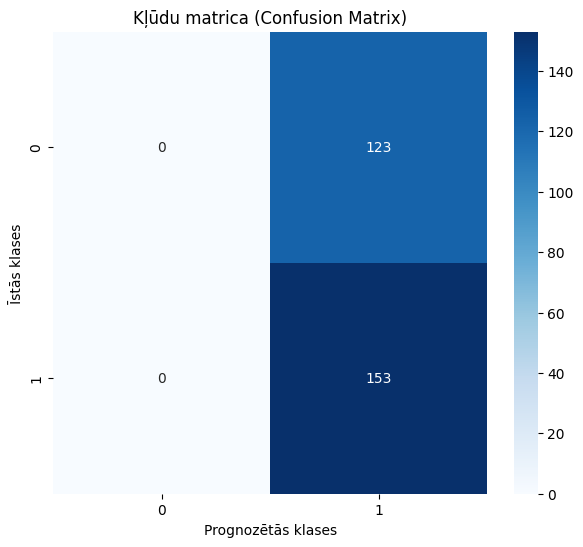


Neironu Tīkla Modeļa Novērtēšana PABEIGTA.


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

perform_supervised_learning = True

def is_non_empty_data_structure(data_var):
    if data_var is None:
        return False
    if isinstance(data_var, (pd.DataFrame, pd.Series)):
        return not data_var.empty
    if isinstance(data_var, np.ndarray):
        return data_var.size > 0
    return False

# Pārbaudām, vai perform_supervised_learning ir definēts un True
# Pieņemam, ka perform_supervised_learning ir globāls mainīgais vai definēts iepriekš.
# Ja nav definēts, iestatām to uz False, lai izvairītos no NameError.
if 'perform_supervised_learning' not in locals():
    perform_supervised_learning = False
    print("Brīdinājums: 'perform_supervised_learning' mainīgais nav definēts. Iestatīts uz False.")

if perform_supervised_learning and \
   'neironu_tikla_modelis' in locals() and neironu_tikla_modelis is not None and \
   is_non_empty_data_structure(X_testa) and \
   is_non_empty_data_structure(y_testa) and \
   len(X_testa) == len(y_testa):

    try:
        print("Modelis un testēšanas dati pieejami. Veic prognozēšanu uz testēšanas kopas.")
        y_prognoze = neironu_tikla_modelis.predict(X_testa)

        print("\nKlasifikācijas ziņojums (Classification Report):")
        print(classification_report(y_testa, y_prognoze, zero_division=0.0))

        print("\nKļūdu matrica (Confusion Matrix):")
        cm = confusion_matrix(y_testa, y_prognoze)
        print(cm)

        print("\nVizualizē Kļūdu matricu...")
        try:
            class_names = [str(c) for c in np.unique(y_testa)]
            print(f"Izmanto unikālās etiķetes no y_testa kā klašu nosaukumus: {class_names}")

            # JŪS VARAT PĀRRAKSTĪT 'class_names' ŠEIT AR JŪSU ZINĀMAJIEM VIRKŠŅU NOSAUKUMIEM
            # Piemēram, ja 0='Nav Slimības', 1='Ir Slimība':
            # class_names = ['Nav Slimības', 'Ir Slimība'] # Pārliecinieties, ka secība atbilst skaitliskajām etiķetēm!
            # Piemēram, ja 0='Adelie', 1='Chinstrap', 2='Gentoo':
            # class_names = ['Adelie', 'Chinstrap', 'Gentoo'] # Pārliecinieties, ka secība atbilst skaitliskajām etiķetēm!
            # Pārliecinieties, ka saraksta garums atbilst np.unique(y_testa) garumam.
            # if len(class_names) != len(np.unique(y_testa)):
            #     print("BRĪDINĀJUMS: Manuāli norādīto klašu nosaukumu skaits neatbilst unikālo klašu skaitam y_testa. Izmantos ģenerētos skaitļus.")
            #     class_names = [str(c) for c in np.unique(y_testa)] # Atgriežas pie skaitļiem, ja skaits neatbilst

        except Exception as e:
            print(f"Neizdevās iegūt unikālās etiķetes no y_testa klašu nosaukumiem: {e}")
            class_names = [f'Klase {i}' for i in range(len(np.unique(y_testa)))]
            print(f"Izmanto vispārīgus klašu nosaukumus, jo neizdevās iegūt no y_testa: {class_names}")


        plt.figure(figsize=(7, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Kļūdu matrica (Confusion Matrix)')
        plt.xlabel('Prognozētās klases')
        plt.ylabel('Īstās klases')
        plt.show()

        print("\nNeironu Tīkla Modeļa Novērtēšana PABEIGTA.")

    except Exception as e:
        print(f"Kļūda neironu tīkla modeļa novērtēšanas laikā: {e}")

else:
    if not perform_supervised_learning:
        print("Neironu Tīkla Modeļa Novērtēšana: IZLAISTA (perform_supervised_learning=False).")
    else:
        print("Neironu Tīkla Modeļa Novērtēšana: IZLAISTA (modeļa vai testēšanas datu trūkst). Izpildiet Datu Sadalīšanas un Apmācības sadaļas.")

## Otrā Neironu Tīkla Modeļa (1 slānis, 5 neironi) Apmācība un Novērtēšana

**Mērķis:** Šī sadaļa ir veltīta alternatīva neironu tīkla modeļa izveidei, apmācībai un veiktspējas novērtēšanai. Tās mērķis ir salīdzināt, kā atšķirīga tīkla arhitektūra un apmācības parametri ietekmē modeļa spēju veikt klasifikāciju.

**Svarīgi priekšnoteikumi:**
* Lai šī sadaļa darbotos, ir jābūt pieejamām sagatavotajām apmācības un testēšanas datu kopām (`X_apmacibas`, `y_apmacibas`, `X_testa`, `y_testa`) no iepriekšējās datu sadalīšanas šūnas (7. sadaļa).

### Otrā Neironu Tīkla Modeļa (1 slānis, 5 neironi) Definēšana un Apmācība

* **Modeļa arhitektūra:** Tiek definēts `MLPClassifier` ar vienkāršāku arhitektūru:
    * `hidden_layer_sizes=5`: Tikai viens slēptais slānis ar 5 neironiem. Tas ir ievērojami mazāk nekā pirmajam modelim, kam bija divi slāņi pa 100 neironiem katrā.
* **Apmācības parametri:**
    * `max_iter=50`: Maksimālais iterāciju skaits ir samazināts līdz 50 (pretstatā 1000 pirmajam modelim). Tas nozīmē, ka modelis apmācīsies daudz īsāku laiku.
    * `activation='logistic'`: Tiek izmantota tā pati loģistiskā (Sigmoid) aktivizācijas funkcija.
    * `solver='sgd'`: Optimizētājs ir tas pats stohastiskais gradienta kritums.
    * `learning_rate_init=0.2`: Sākotnējais mācīšanās ātrums ir nedaudz palielināts (salīdzinājumā ar 0.1 pirmajam modelim). Lielāks mācīšanās ātrums var paātrināt konverģenci, bet arī palielināt nestabilitātes risku.
    * `random_state=42`: Atkal, reproducējamībai.
    * `verbose=False`: Šim modelim nav iespējota detalizēta apmācības progresa izvade (zudumu vērtība katrā iterācijā).
* **Apmācība (`.fit()`):** Modelis tiek apmācīts uz `X_apmacibas` un `y_apmacibas`. Paziņojums brīdinās, ja modelis nesasniegs konverģenci noteiktajā `max_iter` skaitā.

### Otrā Modeļa Novērtēšana (Klasifikācija)

Līdzīgi kā ar pirmo modeli, pēc apmācības tiek veikta modeļa novērtēšana, izmantojot standarta klasifikācijas metriku.

* **Prognozēšana:** Modelis veic prognozes uz `X_testa`, un rezultāti tiek saglabāti `y_prognoze_1_slanis`.
* **Klasifikācijas ziņojums (Classification Report):**
    * Sniedz precizitāti, atsaucamību, F1-score un atbalstu katrai klasei.
    * `zero_division=0.0` parametrs nodrošina, ka tiek izvairīties no kļūdām, ja kāda klase netiek prognozēta.
* **Kļūdu matrica (Confusion Matrix):**
    * Parāda faktisko pret prognozēto klašu skaitu.
    * Tiek vizualizēta kā siltumkarte, izmantojot `seaborn`, ar atbilstošu virsrakstu "Kļūdu matrica (Otrais modelis)".
    * **Klašu nosaukumi:** Tiek mēģināts iegūt klašu nosaukumus no `y_testa` unikālajām vērtībām. Ja jūsu klases atbilst nozīmīgākiem nosaukumiem (piemēram, 'Adelie', 'Chinstrap', 'Gentoo' no jūsu piemēriem), jūs varat manuāli pārrakstīt `class_names_1_slanis` sarakstu, lai uzlabotu vizualizācijas skaidrību.

Šī sadaļa ļaus jums salīdzināt šī vienkāršākā modeļa veiktspēju ar sarežģītāko pirmo modeli, lai novērtētu arhitektūras izvēles ietekmi.

Apmācības un testēšanas dati ('X_apmacibas', 'y_apmacibas', 'X_testa', 'y_testa') ir pieejami un nav tukši. Turpinām.
Otrais neironu tīkla modelis (1 slānis, 5 neironi) definēts.
Apmāca Otro modeli...
Otrais neironu tīkla apmācība pabeigta.

--- Novērtē Otro Neironu Tīkla Modeli ---
Modelis un testēšanas dati pieejami. Veic prognozēšanu uz testēšanas kopas.

Klasifikācijas ziņojums (Classification Report):
              precision    recall  f1-score   support

           0       0.53      0.93      0.67       123
           1       0.86      0.33      0.47       153

    accuracy                           0.60       276
   macro avg       0.69      0.63      0.57       276
weighted avg       0.71      0.60      0.56       276


Kļūdu matrica (Confusion Matrix):
[[115   8]
 [103  50]]

Vizualizē Otro Modeļa Kļūdu matricu...
Izmanto unikālās etiķetes no y_testa kā klašu nosaukumus: ['0', '1']


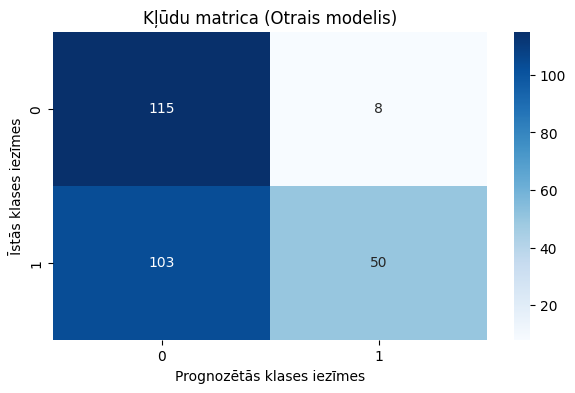


Otrā Neironu Tīkla Modeļa Novērtēšana PABEIGTA.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

def is_non_empty_data_structure(data_var):
    """Pārbauda, vai mainīgais ir NE-TUKŠS pandas DataFrame, Series, vai NumPy masīvs."""
    if data_var is None:
        return False
    if isinstance(data_var, (pd.DataFrame, pd.Series)):
        return not data_var.empty
    if isinstance(data_var, np.ndarray):
        return data_var.size > 0
    return False

if 'X_apmacibas' in locals() and is_non_empty_data_structure(X_apmacibas) and \
   'y_apmacibas' in locals() and is_non_empty_data_structure(y_apmacibas) and \
   len(X_apmacibas) == len(y_apmacibas) and \
   'X_testa' in locals() and is_non_empty_data_structure(X_testa) and \
   'y_testa' in locals() and is_non_empty_data_structure(y_testa) and \
   len(X_testa) == len(y_testa):

    print("Apmācības un testēšanas dati ('X_apmacibas', 'y_apmacibas', 'X_testa', 'y_testa') ir pieejami un nav tukši. Turpinām.")

    try:
        neironu_tikla_modelis_1_slanis = MLPClassifier(
            hidden_layer_sizes=5,
            max_iter=50,
            activation='logistic',
            solver='sgd',
            learning_rate_init=0.2,
            random_state=42,
        )

        print("Otrais neironu tīkla modelis (1 slānis, 5 neironi) definēts.")

        print("Apmāca Otro modeli...")
        neironu_tikla_modelis_1_slanis.fit(X_apmacibas, y_apmacibas)

        print("Otrais neironu tīkla apmācība pabeigta.")
        if neironu_tikla_modelis_1_slanis.n_iter_ == neironu_tikla_modelis_1_slanis.max_iter:
            print("Brīdinājums: Otrais modelis nesasniedza konverģenci maksimālajā iterāciju skaitā (max_iter=50).")
            print("Apsveriet max_iter palielināšanu vai cita optimizētāja izmantošanu šim modelim.")

        print("\n--- Novērtē Otro Neironu Tīkla Modeli ---")

        print("Modelis un testēšanas dati pieejami. Veic prognozēšanu uz testēšanas kopas.")
        y_prognoze_1_slanis = neironu_tikla_modelis_1_slanis.predict(X_testa)

        print("\nKlasifikācijas ziņojums (Classification Report):")
        print(classification_report(y_testa, y_prognoze_1_slanis, zero_division=0.0))

        print("\nKļūdu matrica (Confusion Matrix):")
        cm_1_slanis = confusion_matrix(y_testa, y_prognoze_1_slanis)
        print(cm_1_slanis)

        print("\nVizualizē Otro Modeļa Kļūdu matricu...")

        try:
            class_names_1_slanis = [str(c) for c in np.unique(y_testa)]
            print(f"Izmanto unikālās etiķetes no y_testa kā klašu nosaukumus: {class_names_1_slanis}")

            # JŪS VARAT PĀRRAKSTĪT 'class_names_1_slanis' ŠEIT AR JŪSU ZINĀMAJIEM VIRKŠŅU NOSAUKUMIEM
            # Piemērs (ja 0='Adelie', 1='Chinstrap', 2='Gentoo'):
            # class_names_1_slanis = ['Adelie', 'Chinstrap', 'Gentoo'] # Pārliecinieties, ka secība atbilst skaitliskajām etiķetēm!
            # Pārliecinieties, ka saraksta garums atbilst np.unique(y_testa) garumam.
            # if len(class_names_1_slanis) != len(np.unique(y_testa)):
            #     print("BRĪDINĀJUMS: Manuāli norādīto klašu nosaukumu skaits neatbilst unikālo klašu skaitam y_testa. Izmantos ģenerētos skaitļus.")
            #     class_names_1_slanis = [str(c) for c in np.unique(y_testa)] # Atgriežas pie skaitļiem, ja skaits neatbilst

        except Exception as e:
            print(f"Neizdevās iegūt unikālās etiķetes no y_testa klašu nosaukumiem: {e}")
            class_names_1_slanis = [f'Klase {i}' for i in range(len(np.unique(y_testa)))]
            print(f"Izmanto vispārīgus klašu nosaukumus: {class_names_1_slanis}")

        fig, ax = plt.subplots(figsize=(7,4))

        sns.heatmap(cm_1_slanis, annot=True, fmt='d', cmap='Blues', cbar=True,
                    xticklabels=class_names_1_slanis, yticklabels=class_names_1_slanis, ax=ax)

        ax.set_ylabel('Īstās klases iezīmes');
        ax.set_xlabel('Prognozētās klases iezīmes');
        ax.set_title('Kļūdu matrica (Otrais modelis)');

        plt.show()

        print("\nOtrā Neironu Tīkla Modeļa Novērtēšana PABEIGTA.")

    except Exception as e:
        print(f"Kļūda Otrā neironu tīkla modeļa definēšanas, apmācības vai novērtēšanas laikā: {e}")
        neironu_tikla_modelis_1_slanis = None

else:
    print("Otrā Neironu Tīkla Modeļa apmācība un novērtēšana: IZLAISTA (apmācības vai testēšanas dati nav pieejami). Pārliecinieties, ka Datu Sadalīšanas sadaļa ir izpildīta.")
    neironu_tikla_modelis_1_slanis = None

## K-Nearest Neighbors (KNN) Modeļa Apmācība un Novērtēšana

**Mērķis:** Šajā sadaļā tiek izmantots un novērtēts vēl viens populārs mašīnmācīšanās algoritms klasifikācijas uzdevumam – K-Nearest Neighbors (KNN). KNN ir vienkāršs, bet efektīvs neparametriskais algoritms, kas klasificē datu punktus, pamatojoties uz to tuvāko kaimiņu (pēc attāluma) klašu vairākumu.

**Svarīgi priekšnoteikumi:**
* Lai šī sadaļa darbotos, ir jābūt pieejamām apmācības un testēšanas datu kopām (`X_apmacibas`, `y_apmacibas`, `X_testa`, `y_testa`) no datu sadalīšanas posma (7. sadaļa).

### K-Nearest Neighbors (KNN) Algoritma Definēšana un Apmācība

* **Algoritma princips:** KNN modeļa pamatā ir pieņēmums, ka līdzīgi objekti atrodas tuvu viens otram. Jaunam datu punktam tiek piešķirta tā klase, kas ir visizplatītākā starp tā `k` tuvākajiem kaimiņiem apmācības datu kopā.
* **Parametrs `n_neighbors`:**
    * Šeit modelis tiek definēts ar `n_neighbors=5`, kas nozīmē, ka klasifikācija notiks, pamatojoties uz 5 tuvākajiem kaimiņiem. Šī vērtība ir viens no svarīgākajiem hiperparametriem, ko var optimizēt, lai uzlabotu modeļa veiktspēju.
* **Apmācība (`.fit()`):** KNN ir "slinks" (lazy) algoritms, kas nozīmē, ka apmācības posmā tas galvenokārt tikai atceras visus apmācības datus. Faktiskais klasifikācijas darbs notiek prognozēšanas laikā.

### KNN Modeļa Novērtēšana (Klasifikācija)

Pēc modeļa apmācības (datu ielādes) tiek veikta tā veiktspējas novērtēšana uz testēšanas kopas, lai noteiktu, cik labi modelis spēj vispārināt un prognozēt iepriekš neredzētus datus.

* **Prognozēšana:** Modelis veic prognozes uz `X_testa`, un rezultāti tiek saglabāti `y_prognoze_knn`.
* **Klasifikācijas ziņojums (Classification Report):**
    * Tiek izvadīts detalizēts pārskats ar Precision, Recall, F1-score un Support rādītājiem katrai klasei.
    * `zero_division=0.0` nodrošina stabilu izvadi, ja kādai klasei nav prognozētu gadījumu.
* **Kļūdu matrica (Confusion Matrix):**
    * Vizualizē reālās un prognozētās klašu vērtības.
    * Matrica tiek attēlota kā siltumkarte, izmantojot `seaborn`, ar nosaukumu "Kļūdu matrica (KNN algoritms)".
    * **Klašu nosaukumi:** Tiek izmantotas unikālās vērtības no `y_testa` kā klašu nosaukumi. Ja jūsu klases atbilst nozīmīgākiem nosaukumiem (piemēram, 'Adelie', 'Chinstrap', 'Gentoo'), ieteicams manuāli pārrakstīt `class_names_knn` sarakstu, lai padarītu vizualizāciju saprotamāku.

Šī sadaļa ļaus jums iegūt ieskatu par to, kā KNN algoritms darbojas jūsu datu kopā, un salīdzināt tā veiktspēju ar iepriekš apmācītajiem neironu tīklu modeļiem.

Apmācības un testēšanas dati ('X_apmacibas', 'y_apmacibas', 'X_testa', 'y_testa') ir pieejami un nav tukši. Turpinām.
KNN modelis definēts ar n_neighbors=5.
Apmāca KNN modeli...
KNN modeļa apmācība pabeigta.

--- Novērtē KNN Modeli ---
Modelis un testēšanas dati pieejami. Veic prognozēšanu uz testēšanas kopas.

Klasifikācijas ziņojums (Classification Report):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       123
           1       0.73      0.73      0.73       153

    accuracy                           0.70       276
   macro avg       0.70      0.70      0.70       276
weighted avg       0.70      0.70      0.70       276


Kļūdu matrica (Confusion Matrix):
[[ 82  41]
 [ 41 112]]

Vizualizē KNN Modeļa Kļūdu matricu...
Izmanto unikālās etiķetes no y_testa kā klašu nosaukumus: ['0', '1']


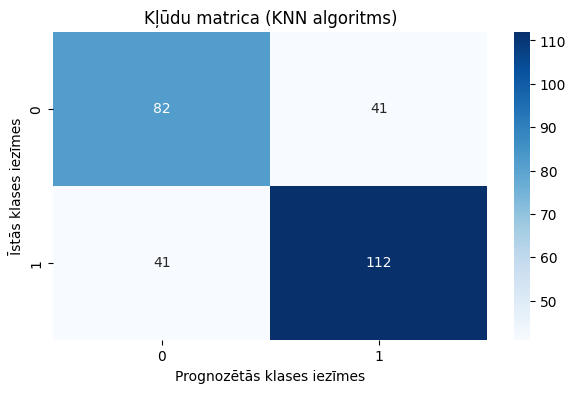


KNN Modeļa Novērtēšana PABEIGTA.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def is_non_empty_data_structure(data_var):
    """Pārbauda, vai mainīgais ir NE-TUKŠS pandas DataFrame, Series, vai NumPy masīvs."""
    if data_var is None:
        return False
    if isinstance(data_var, (pd.DataFrame, pd.Series)):
        return not data_var.empty
    if isinstance(data_var, np.ndarray):
        return data_var.size > 0
    return False

if 'X_apmacibas' in locals() and is_non_empty_data_structure(X_apmacibas) and \
   'y_apmacibas' in locals() and is_non_empty_data_structure(y_apmacibas) and \
   len(X_apmacibas) == len(y_apmacibas) and \
   'X_testa' in locals() and is_non_empty_data_structure(X_testa) and \
   'y_testa' in locals() and is_non_empty_data_structure(y_testa) and \
   len(X_testa) == len(y_testa):

    print("Apmācības un testēšanas dati ('X_apmacibas', 'y_apmacibas', 'X_testa', 'y_testa') ir pieejami un nav tukši. Turpinām.")

    try:
        KNN_MODEL = KNeighborsClassifier(n_neighbors=5)

        print(f"KNN modelis definēts ar n_neighbors={KNN_MODEL.n_neighbors}.")

        print("Apmāca KNN modeli...")
        KNN_MODEL.fit(X_apmacibas, y_apmacibas)

        print("KNN modeļa apmācība pabeigta.")

        print("\n--- Novērtē KNN Modeli ---")

        print("Modelis un testēšanas dati pieejami. Veic prognozēšanu uz testēšanas kopas.")
        y_prognoze_knn = KNN_MODEL.predict(X_testa)

        print("\nKlasifikācijas ziņojums (Classification Report):")
        print(classification_report(y_testa, y_prognoze_knn, zero_division=0.0))

        print("\nKļūdu matrica (Confusion Matrix):")
        kludu_matica_knn = confusion_matrix(y_testa, y_prognoze_knn)
        print(kludu_matica_knn)

        print("\nVizualizē KNN Modeļa Kļūdu matricu...")

        try:
            class_names_knn = [str(c) for c in np.unique(y_testa)]
            print(f"Izmanto unikālās etiķetes no y_testa kā klašu nosaukumus: {class_names_knn}")

            # JŪS VARAT PĀRRAKSTĪT 'class_names_knn' ŠEIT AR JŪSU ZINĀMAJIEM VIRKŠŅU NOSAUKUMIEM
            # Piemērs (ja 0='Adelie', 1='Chinstrap', 2='Gentoo'):
            # class_names_knn = ['Adelie', 'Chinstrap', 'Gentoo'] # Pārliecinieties, ka secība atbilst skaitliskajām etiķetēm!
            # Pārliecinieties, ka saraksta garums atbilst np.unique(y_testa) garumam.
            # if len(class_names_knn) != len(np.unique(y_testa)):
            #     print("BRĪDINĀJUMS: Manuāli norādīto klašu nosaukumu skaits neatbilst unikālo klašu skaitam y_testa. Izmantos ģenerētos skaitļus.")
            #     class_names_knn = [str(c) for c in np.unique(y_testa)] # Atgriežas pie skaitļiem, ja skaits neatbilst

        except Exception as e:
            print(f"Neizdevās iegūt unikālās etiķetes no y_testa klašu nosaukumiem: {e}")
            class_names_knn = [f'Klase {i}' for i in range(len(np.unique(y_testa)))]
            print(f"Izmanto vispārīgus klašu nosaukumus: {class_names_knn}")

        fig, ax = plt.subplots(figsize=(7,4))

        sns.heatmap(kludu_matica_knn, annot=True, fmt='d', cmap='Blues', cbar=True,
                    xticklabels=class_names_knn, yticklabels=class_names_knn, ax=ax)

        ax.set_ylabel('Īstās klases iezīmes');
        ax.set_xlabel('Prognozētās klases iezīmes');
        ax.set_title('Kļūdu matrica (KNN algoritms)');

        plt.show()

        print("\nKNN Modeļa Novērtēšana PABEIGTA.")

    except Exception as e:
        print(f"Kļūda KNN modeļa definēšanas, apmācības vai novērtēšanas laikā: {e}")
        KNN_MODEL = None

else:
    print("KNN algoritma apmācība un novērtēšana: IZLAISTA (apmācības vai testēšanas dati nav pieejami). Pārliecinieties, ka Datu Sadalīšanas sadaļa ir izpildīta.")
    KNN_MODEL = None